In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib widget
%matplotlib notebook
from assignment1 import assignment1, plot_scatter


animals_csv = pd.read_csv("zoo.data", header=None, 
            names = ["animal", "hair", "feathers", "eggs", "milk", "airborne",
                     "aquatic", "predator", "toothed", "backbone", "breathes",
                     "venomous", "fins", "legs", "tail", "domestic", "catsize",
                     "type"]
                    )
animals = animals_csv.copy()


class_mapping = {
    1:"Mammal",
    2 : "Bird",
    3 : "Reptile",
    4 : "Fish",
    5 : "Amphibian", 
    6 : "Bug", 
    7 : "Invertebrate"
}
animals['type'] = animals['type'].replace(class_mapping)

animals_nolegs = animals.drop(['legs'], axis=1)

#Hot econding of the legs variable
animals_he =  pd.get_dummies(animals, columns=["legs"])
animals_he.head(2)



animal  hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
0  aardvark     1         0     0     1         0        0         1        1   
1  antelope     1         0     0     1         0        0         0        1   

   backbone  ...  tail  domestic  catsize    type  legs_0  legs_2 legs_4  \
0         1  ...     0         0        1  Mammal       0       0      1   
1         1  ...     1         0        1  Mammal       0       0      1   

   legs_5  legs_6  legs_8  
0       0       0       0  
1       0       0       0  

[2 rows x 23 columns]

In [2]:
ass1 = assignment1(animals_he, ['type', 'animal'], 7)
ass1.pca_sklearn()
ass1.pca_svd()
ass1.mds_distance_matrix()
ass1.calculate_information_gain()
weighted_animals_k_mds_df, lamda_w, vl = ass1.mds_distance_matrix_importance()
print("")

<IPython.core.display.Javascript object>


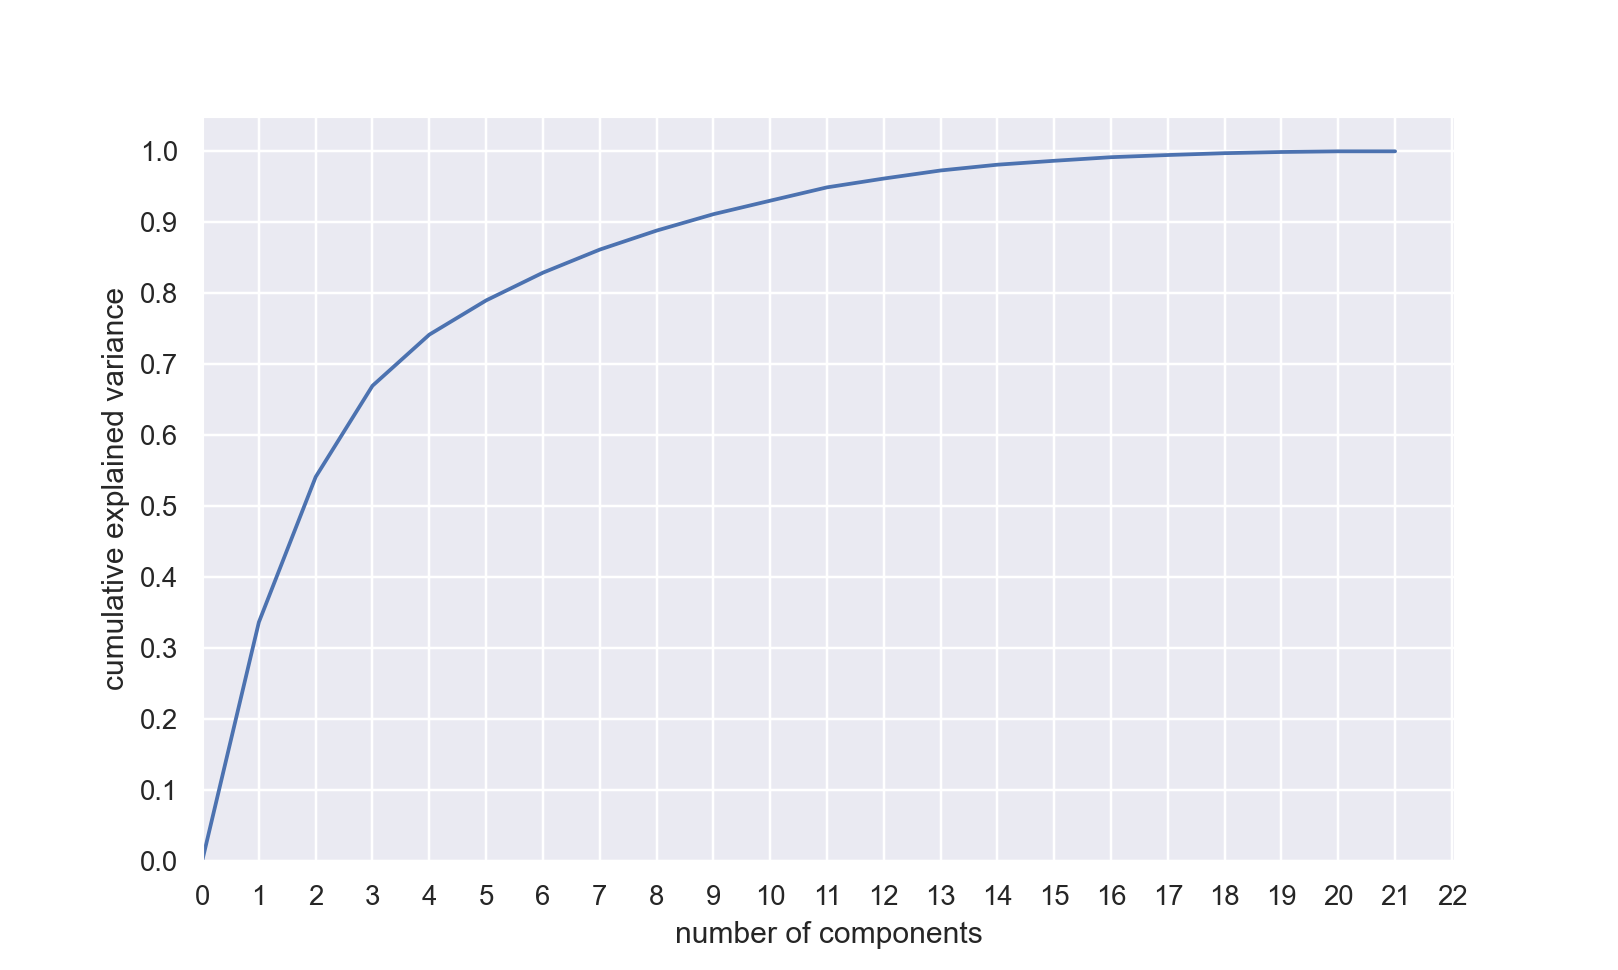

In [14]:
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111)
explained_variance = np.cumsum(ass1.explained_variance_ratio_)
explained_variance = np.insert(explained_variance, 0, 0, axis=0)
plt.plot(explained_variance)
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))

plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

<IPython.core.display.Javascript object>


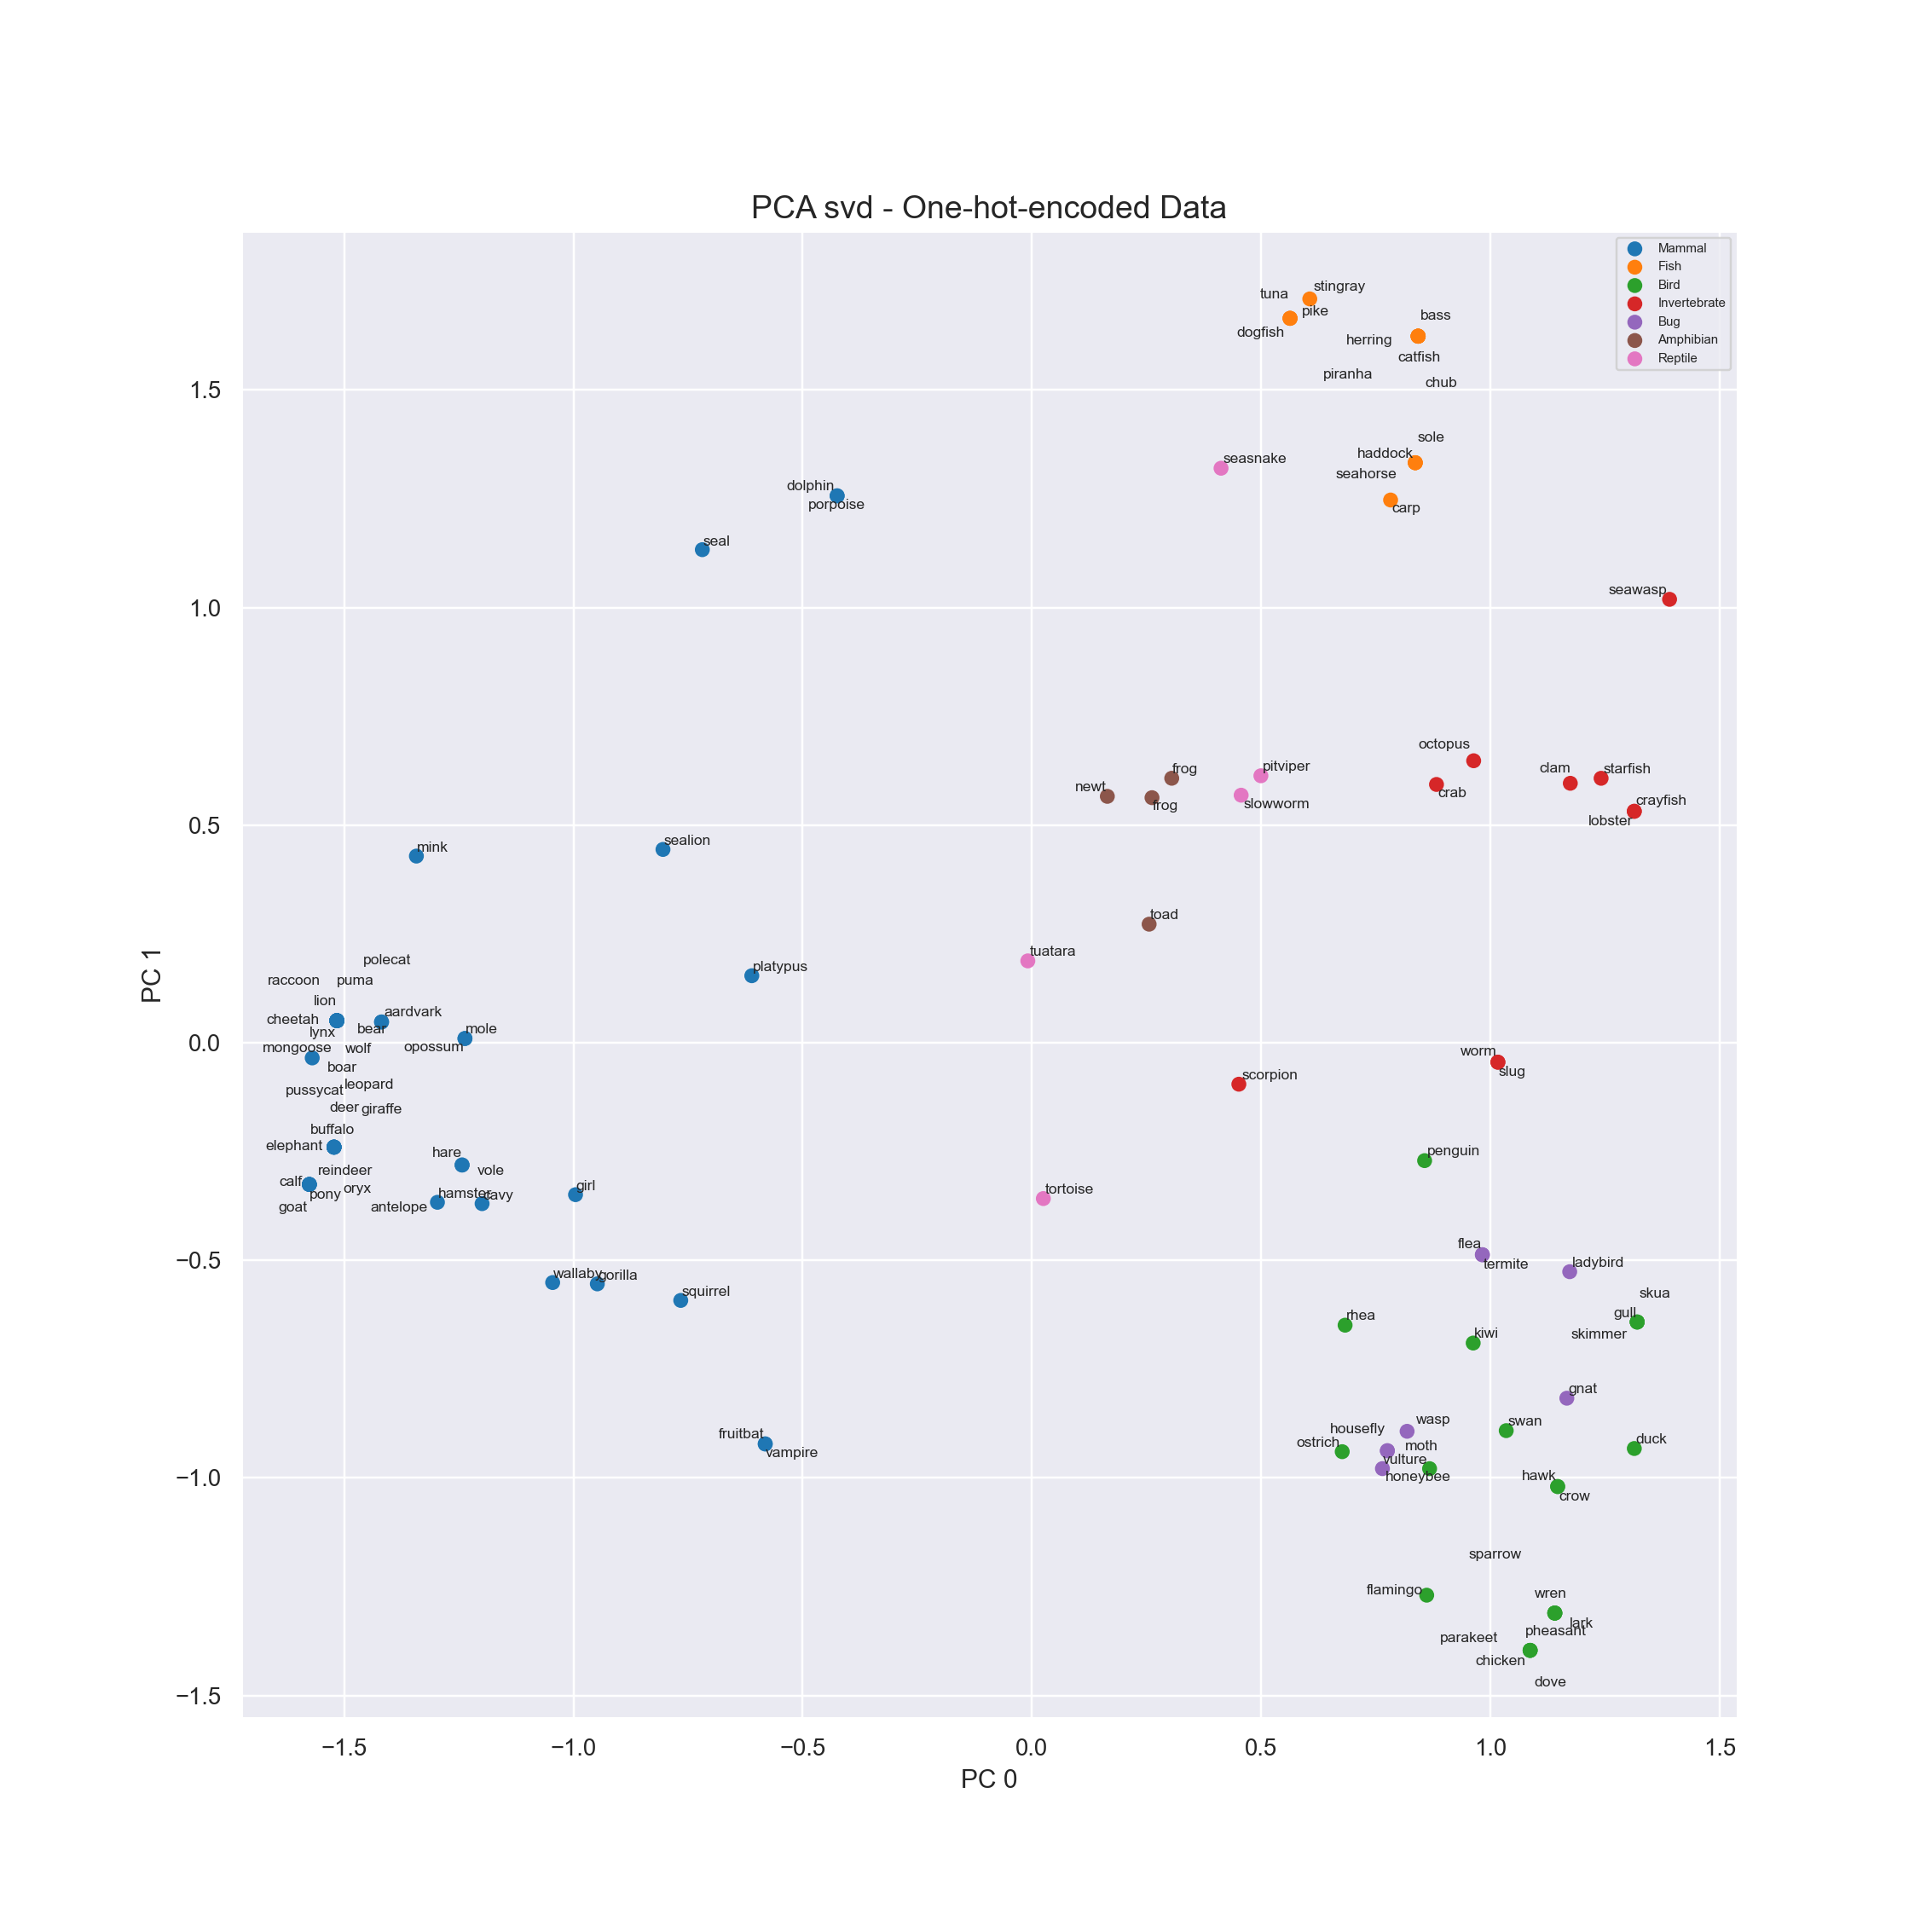

<AxesSubplot:title={'center':'PCA svd - One-hot-encoded Data'}, xlabel='PC 0', ylabel='PC 1'>

In [4]:
plot_scatter(ass1.animals_k_pca_df, "PCA svd - One-hot-encoded Data", fsize=(7,7), axis_text = "PC ", save="images/")

In [5]:
# plot_scatter(ass1.animals_k_pca_df, "PCA svd - One-hot-encoded Data", None, True, (5,5), "PC ", ["2", "3"])

<IPython.core.display.Javascript object>


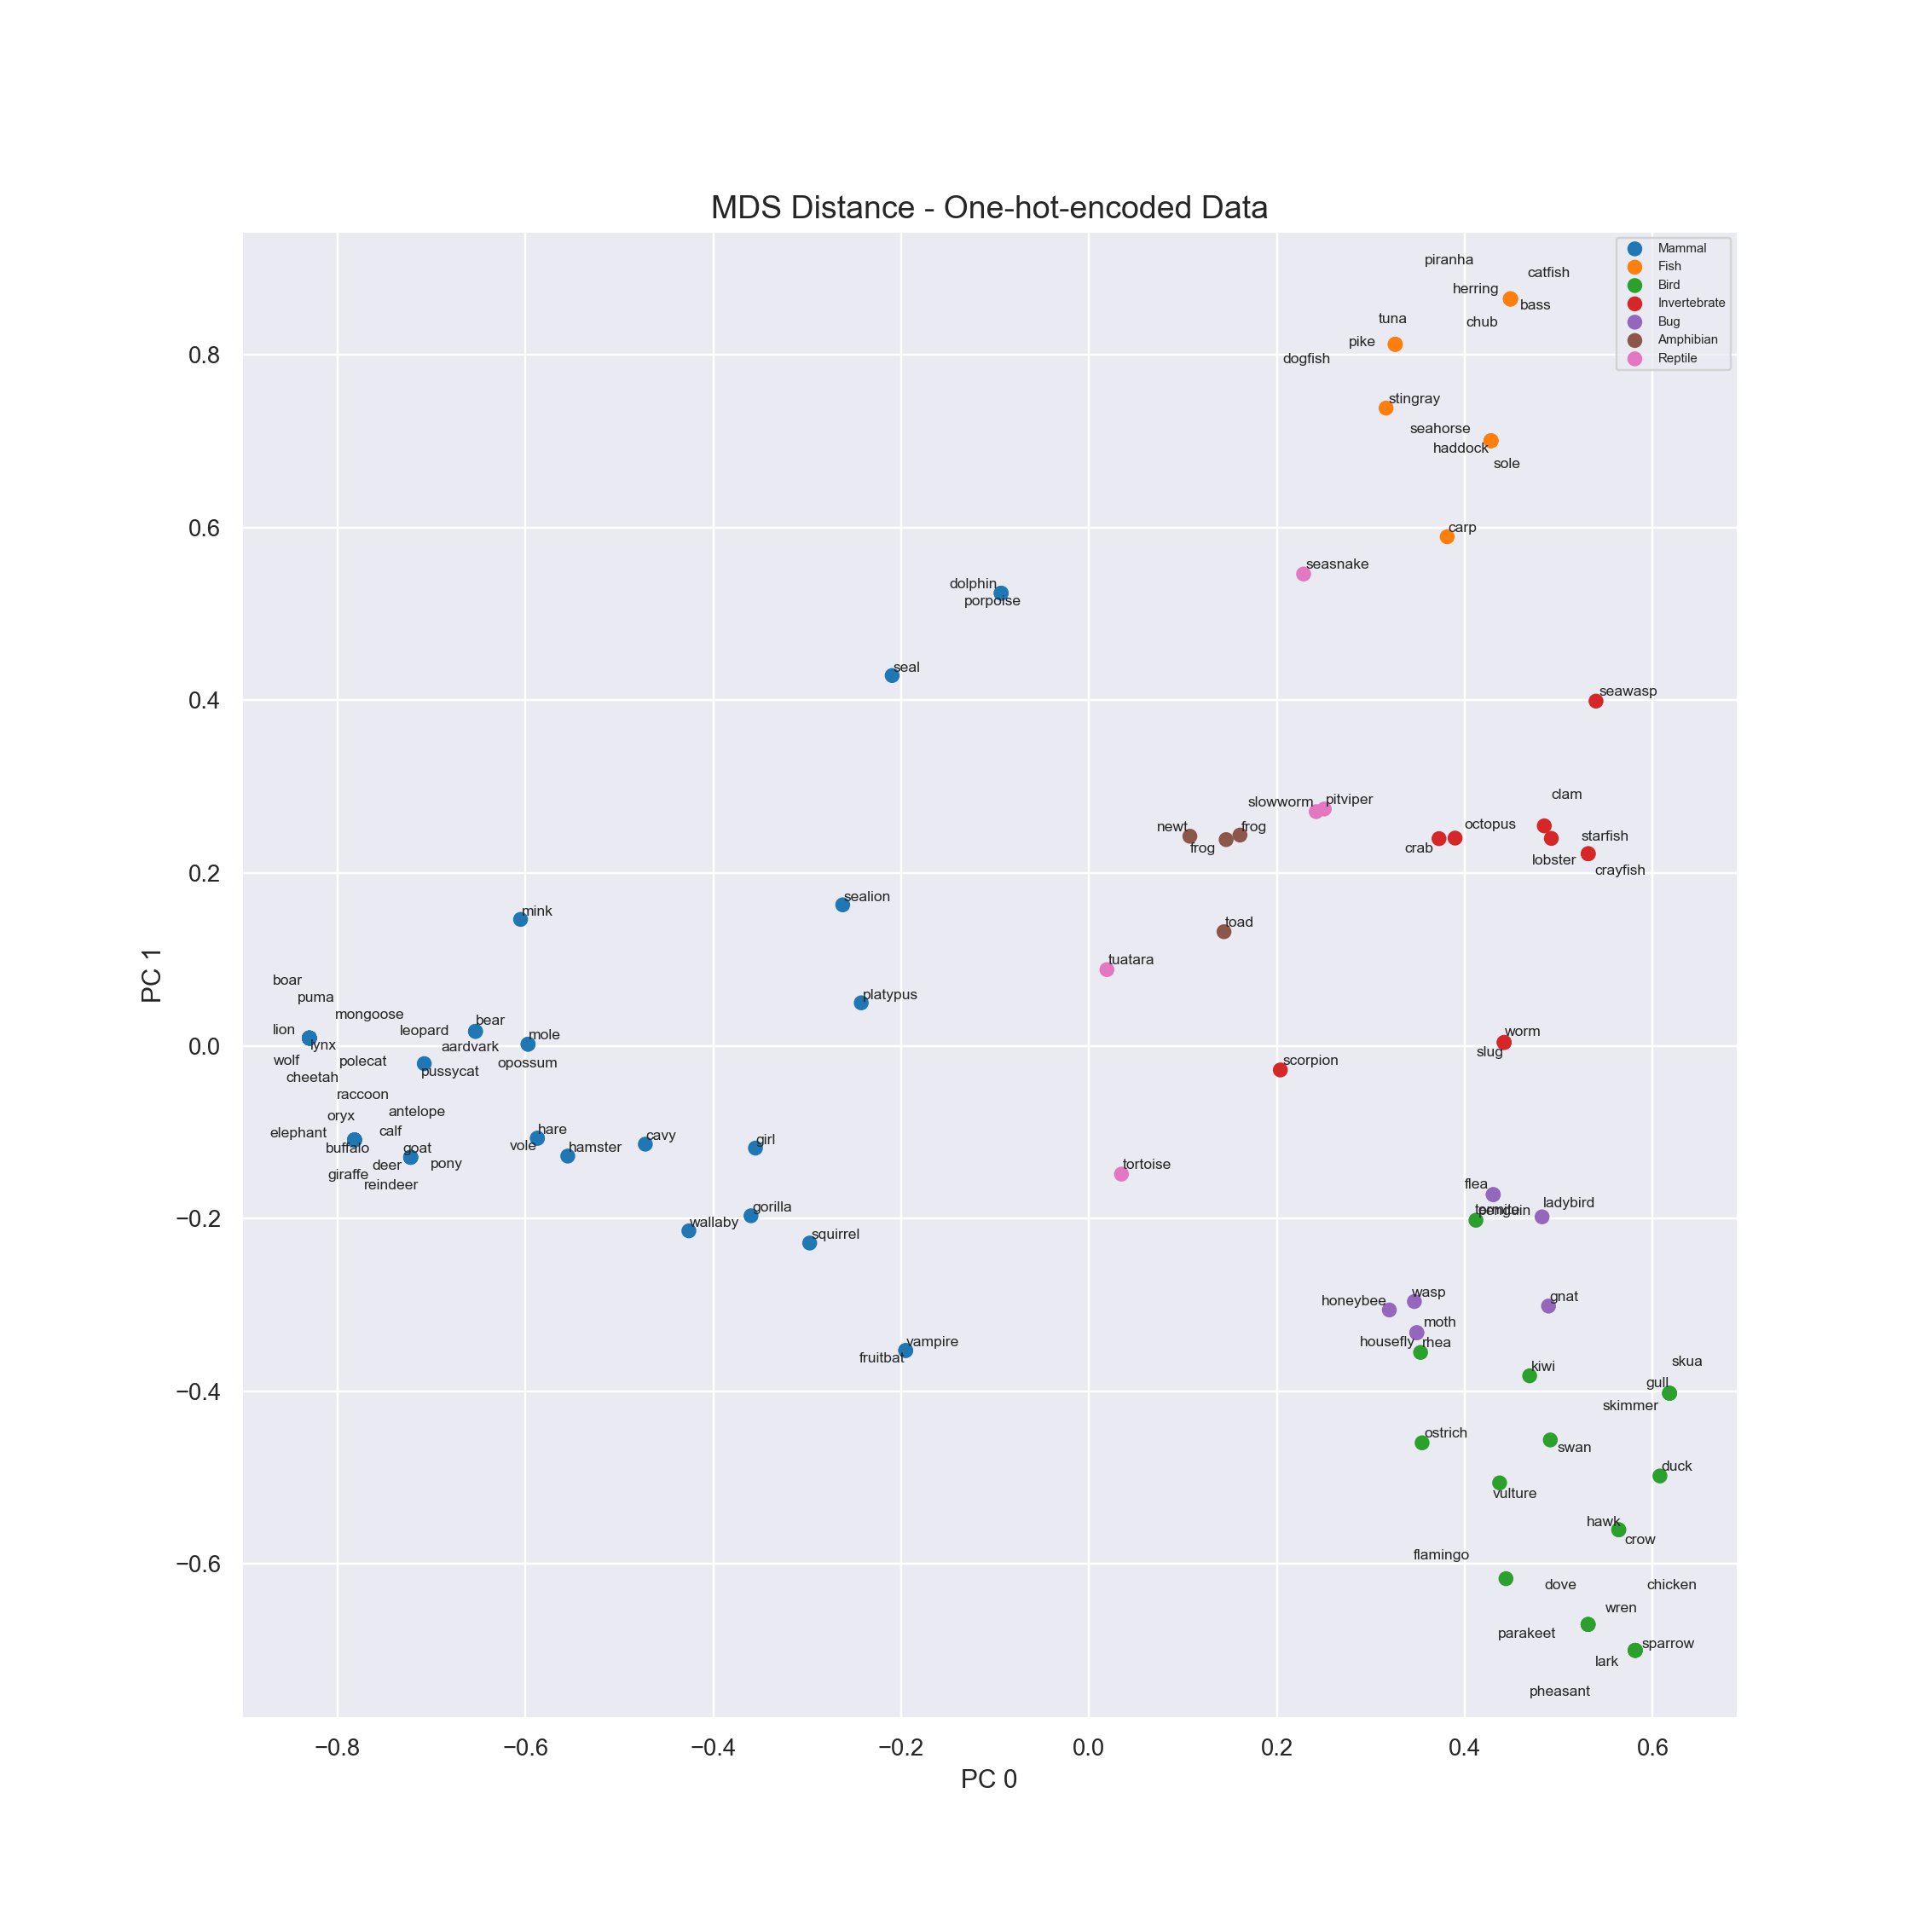

<AxesSubplot:title={'center':'MDS Distance - One-hot-encoded Data'}, xlabel='PC 0', ylabel='PC 1'>

In [5]:
plot_scatter(ass1.animals_k_mds_df, "MDS Distance - One-hot-encoded Data", fsize=(7,7), axis_text = "PC ", save="images/")

In [27]:
ass1.information_gain_df.round(2).to_csv("information_gain.csv", index=False)
# info_gain_df['information_gain'] = pd.Series(["{0:.2f}%".format(val * 100) for val in info_gain_df['information_gain']], index = info_gain_df.index)


<IPython.core.display.Javascript object>


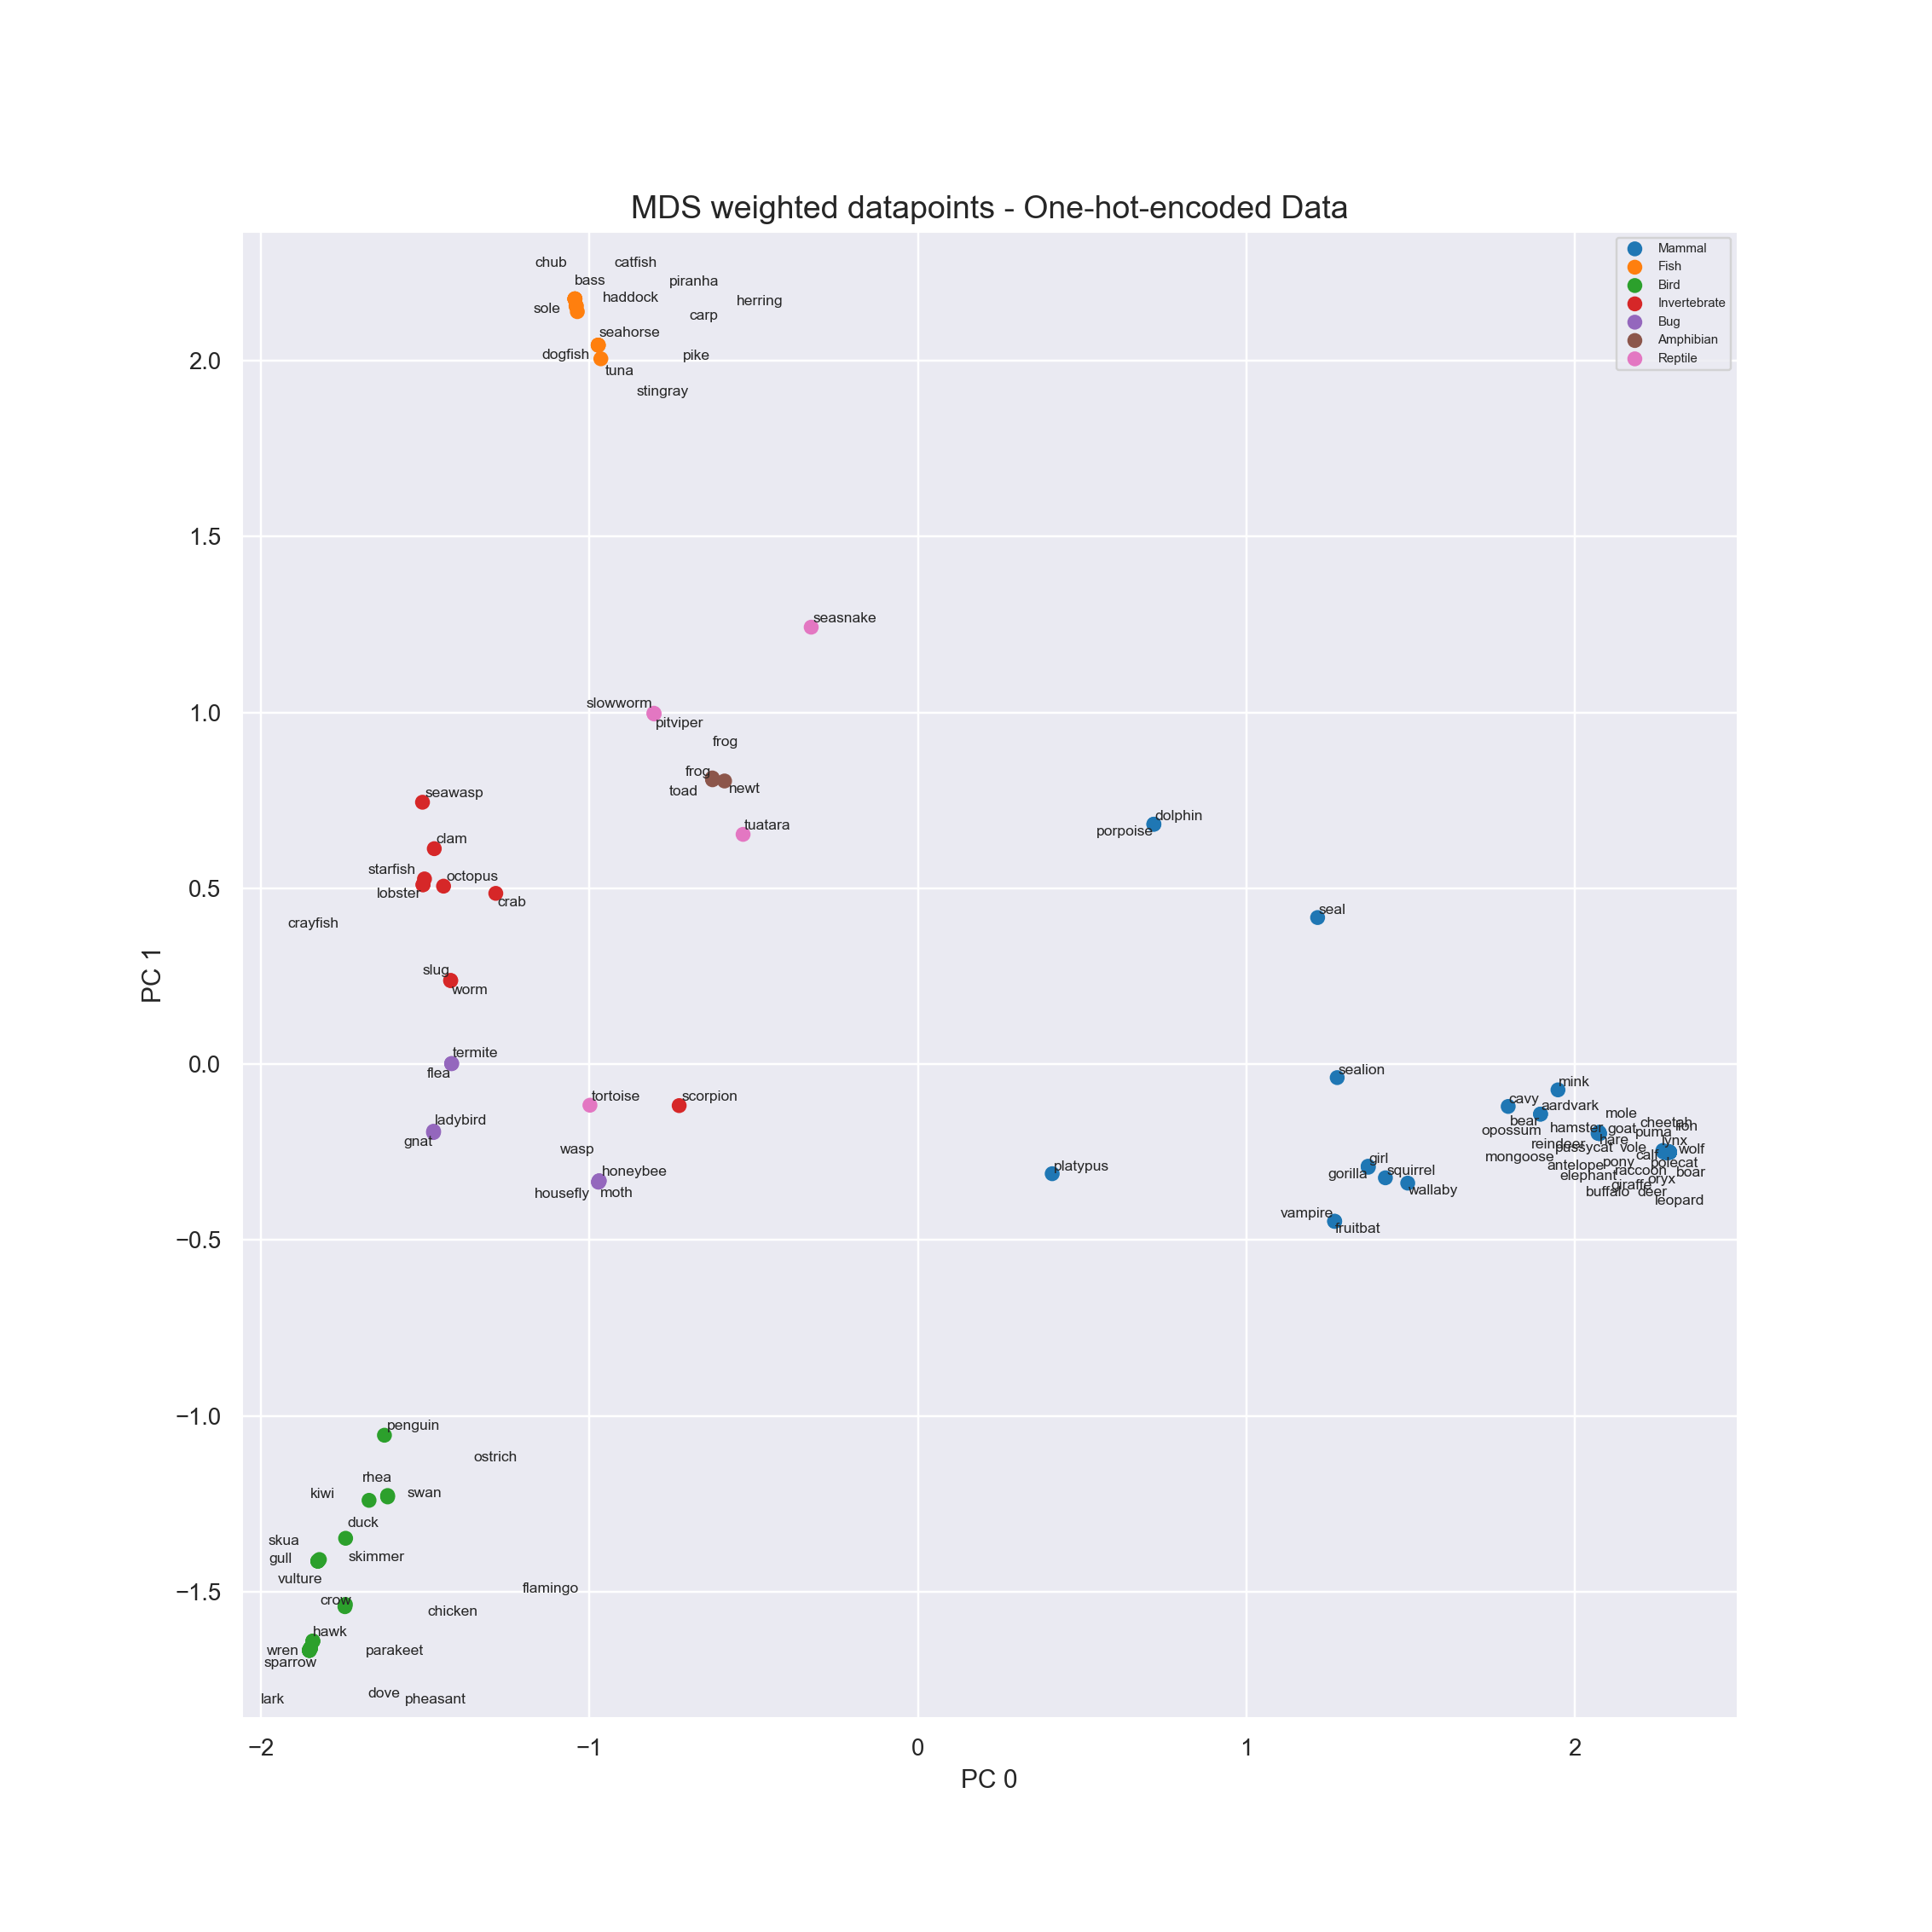

In [7]:
ax = plot_scatter(ass1.weighted_animals_k_mds_df, "MDS weighted datapoints - One-hot-encoded Data", fsize=(7,7), axis_text = "PC ", save="images/")

<IPython.core.display.Javascript object>


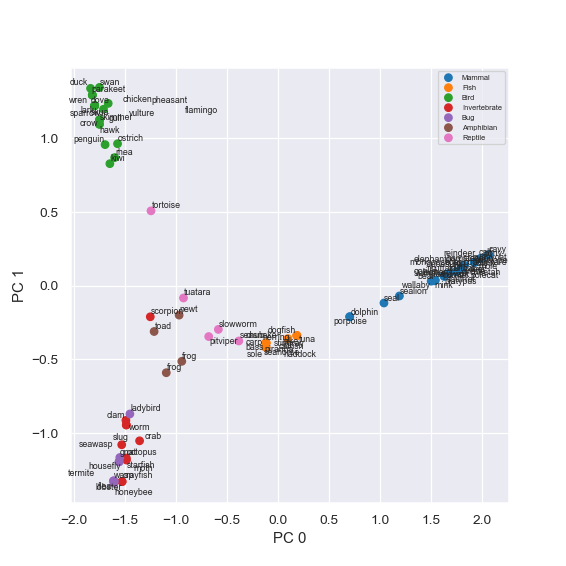

In [40]:
k = 5
isomap_df, lamda, vl = ass1.iso_map(k)
ax = plot_scatter(ass1.animals_k_isomap_df, "", fsize=(7,7), axis_text = "PC ", save="images/")

<IPython.core.display.Javascript object>


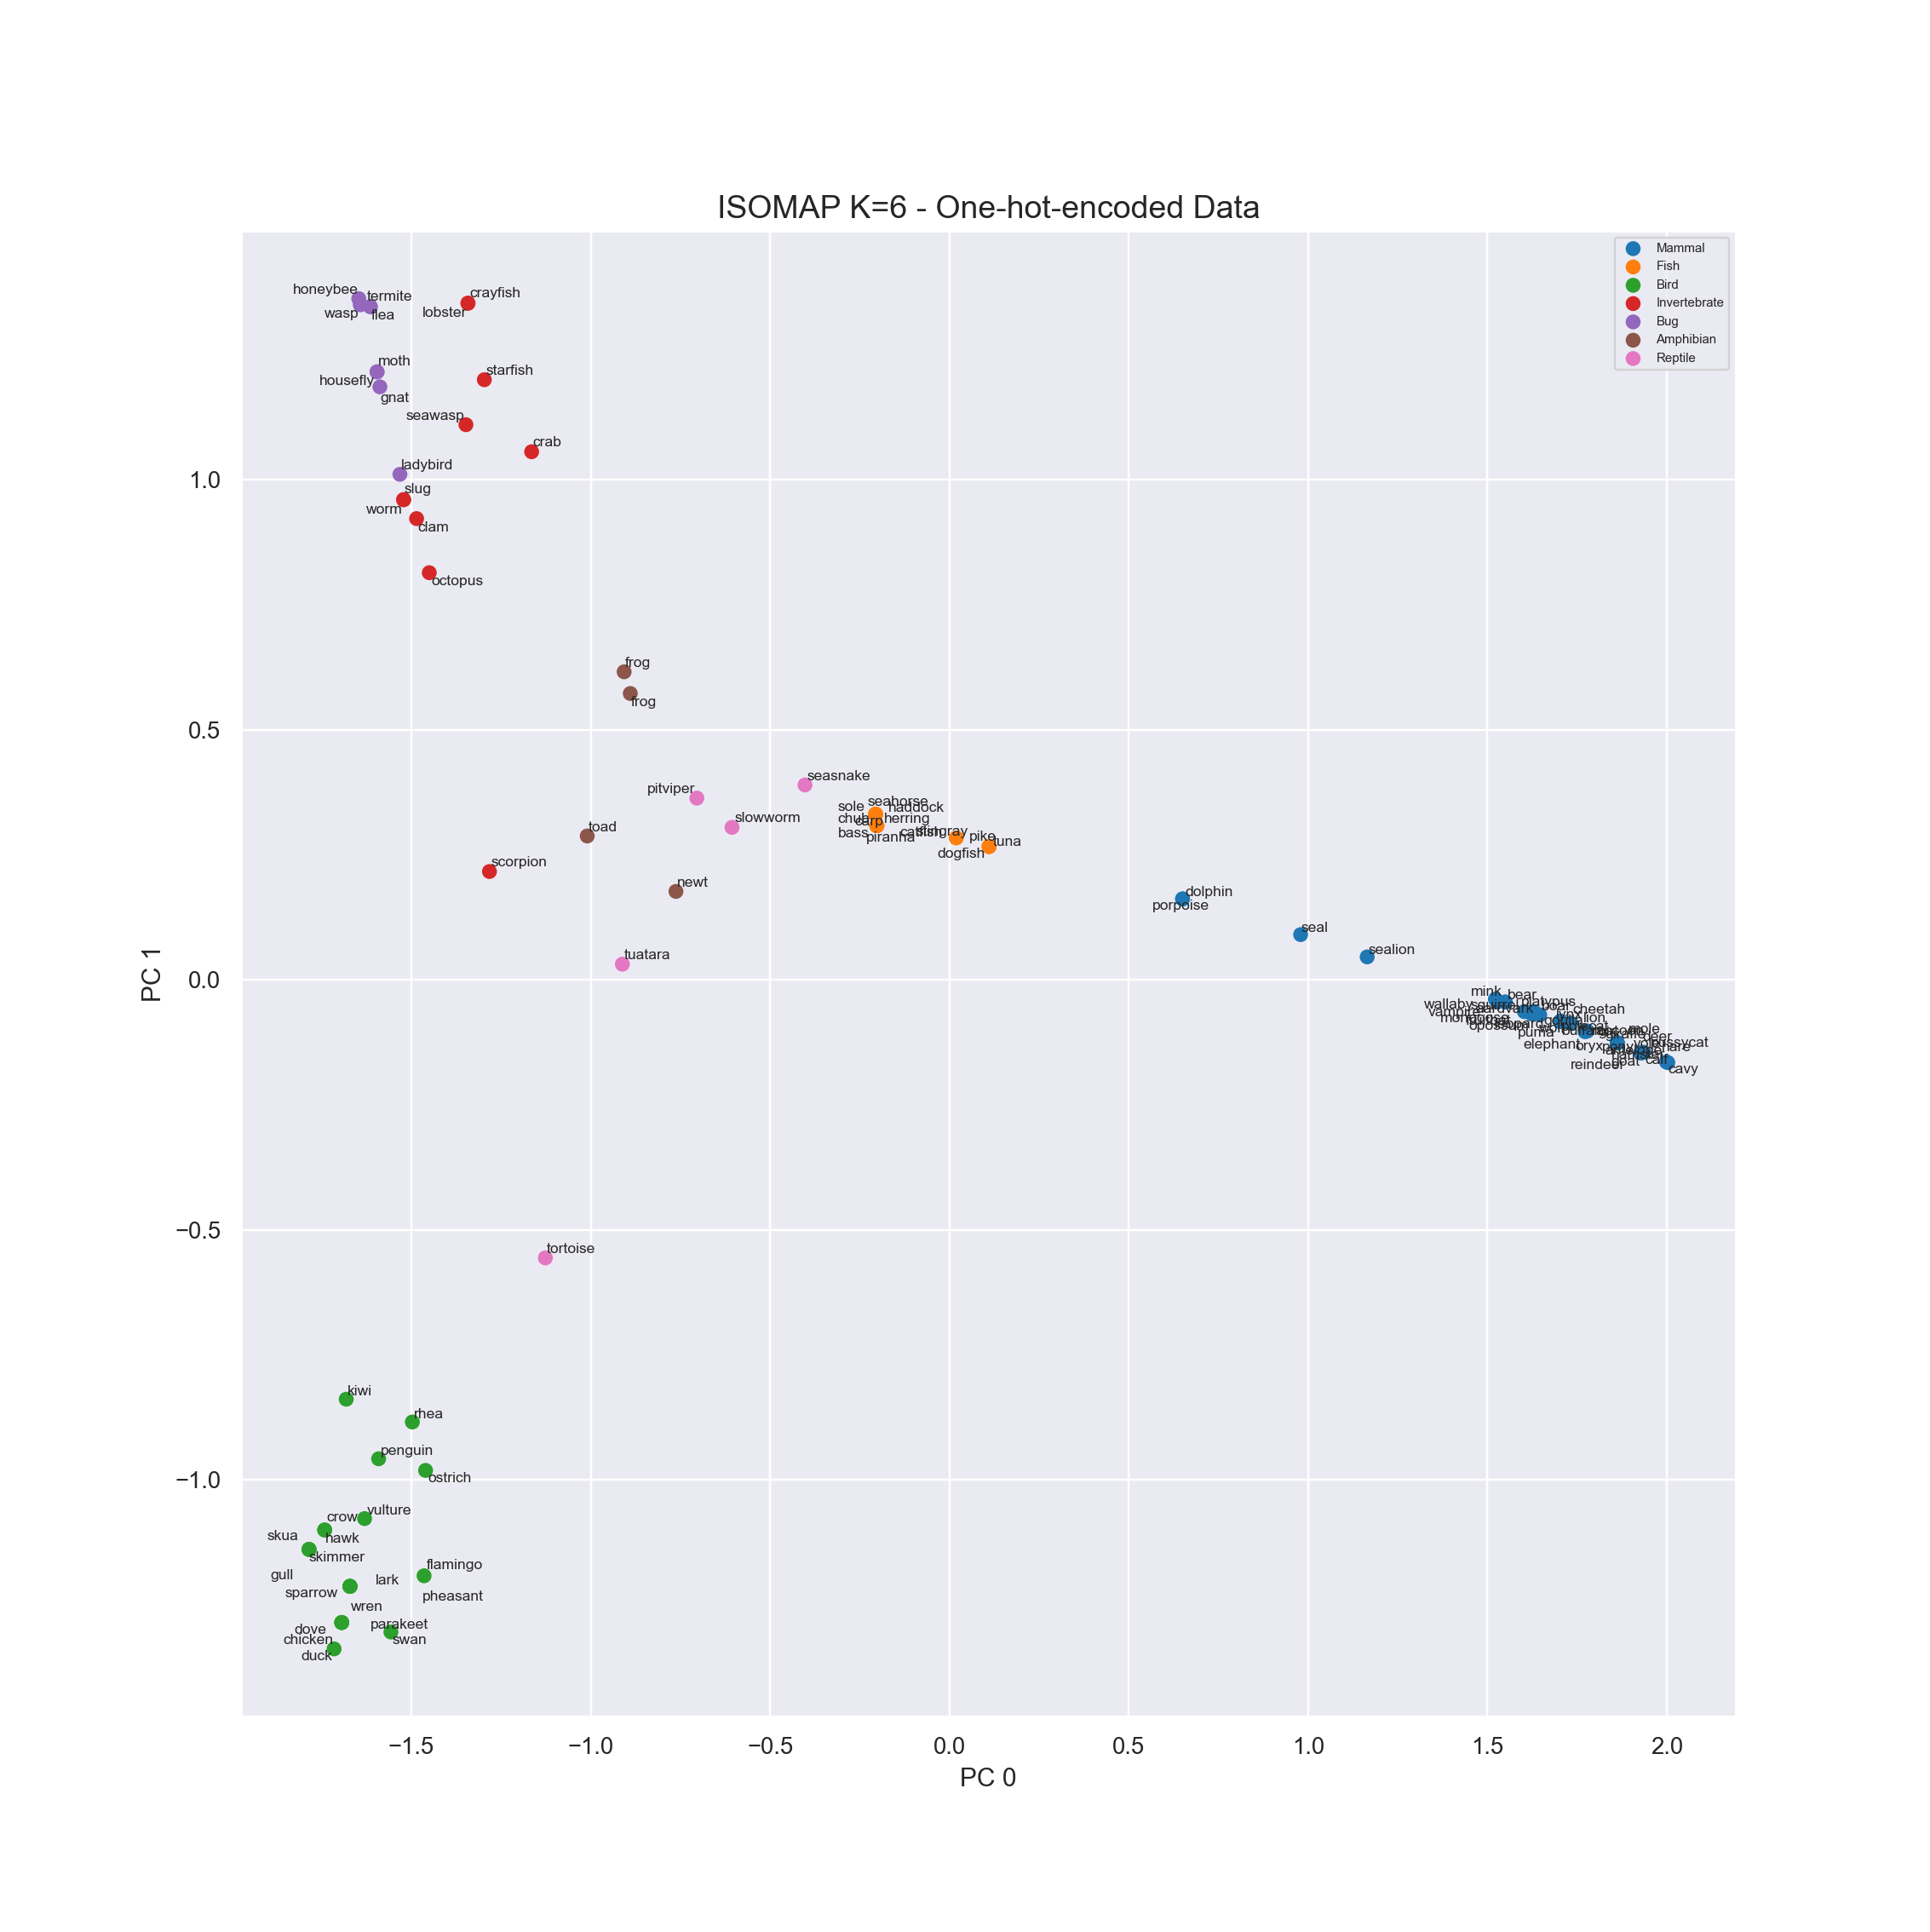

In [9]:
k = 6
ass1.iso_map(k)
ax = plot_scatter(ass1.animals_k_isomap_df, "ISOMAP K={} - One-hot-encoded Data".format(k), fsize=(7,7), axis_text = "PC ", save="images/")

<IPython.core.display.Javascript object>


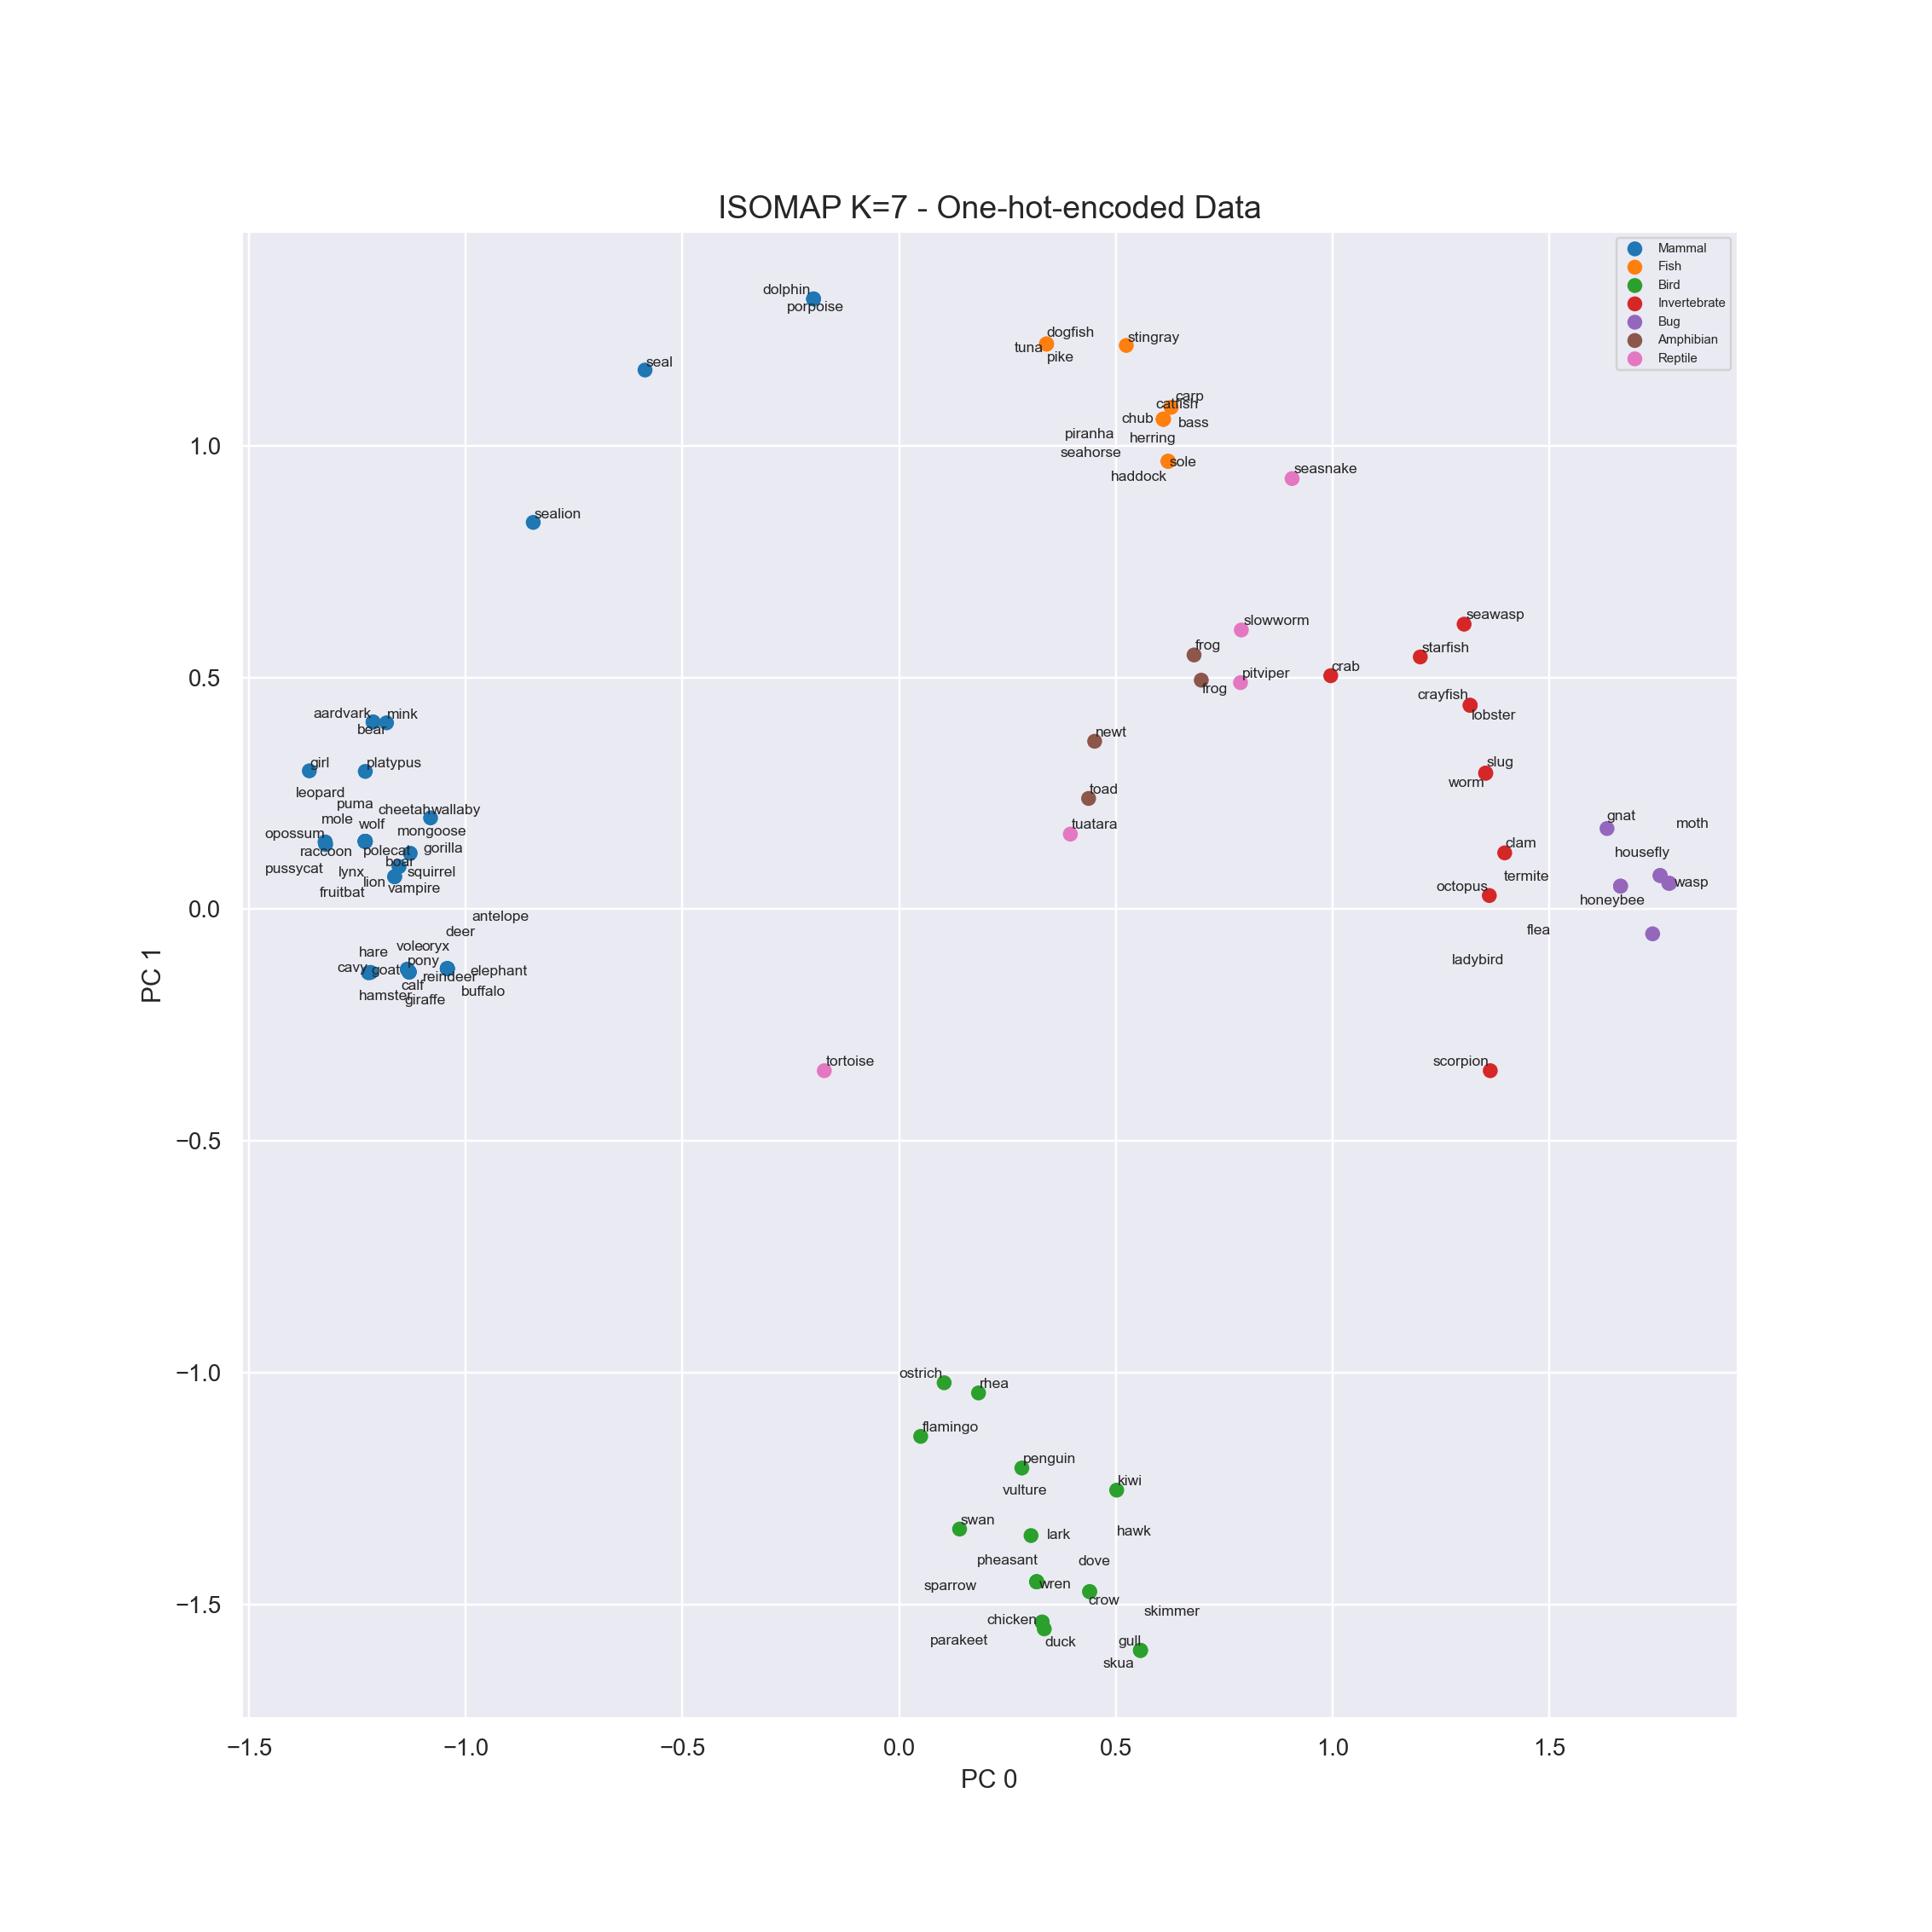

In [10]:
k = 7
ass1.iso_map(k)
ax = plot_scatter(ass1.animals_k_isomap_df, "ISOMAP K={} - One-hot-encoded Data".format(k), fsize=(7,7), axis_text = "PC ", save="images/")

<IPython.core.display.Javascript object>


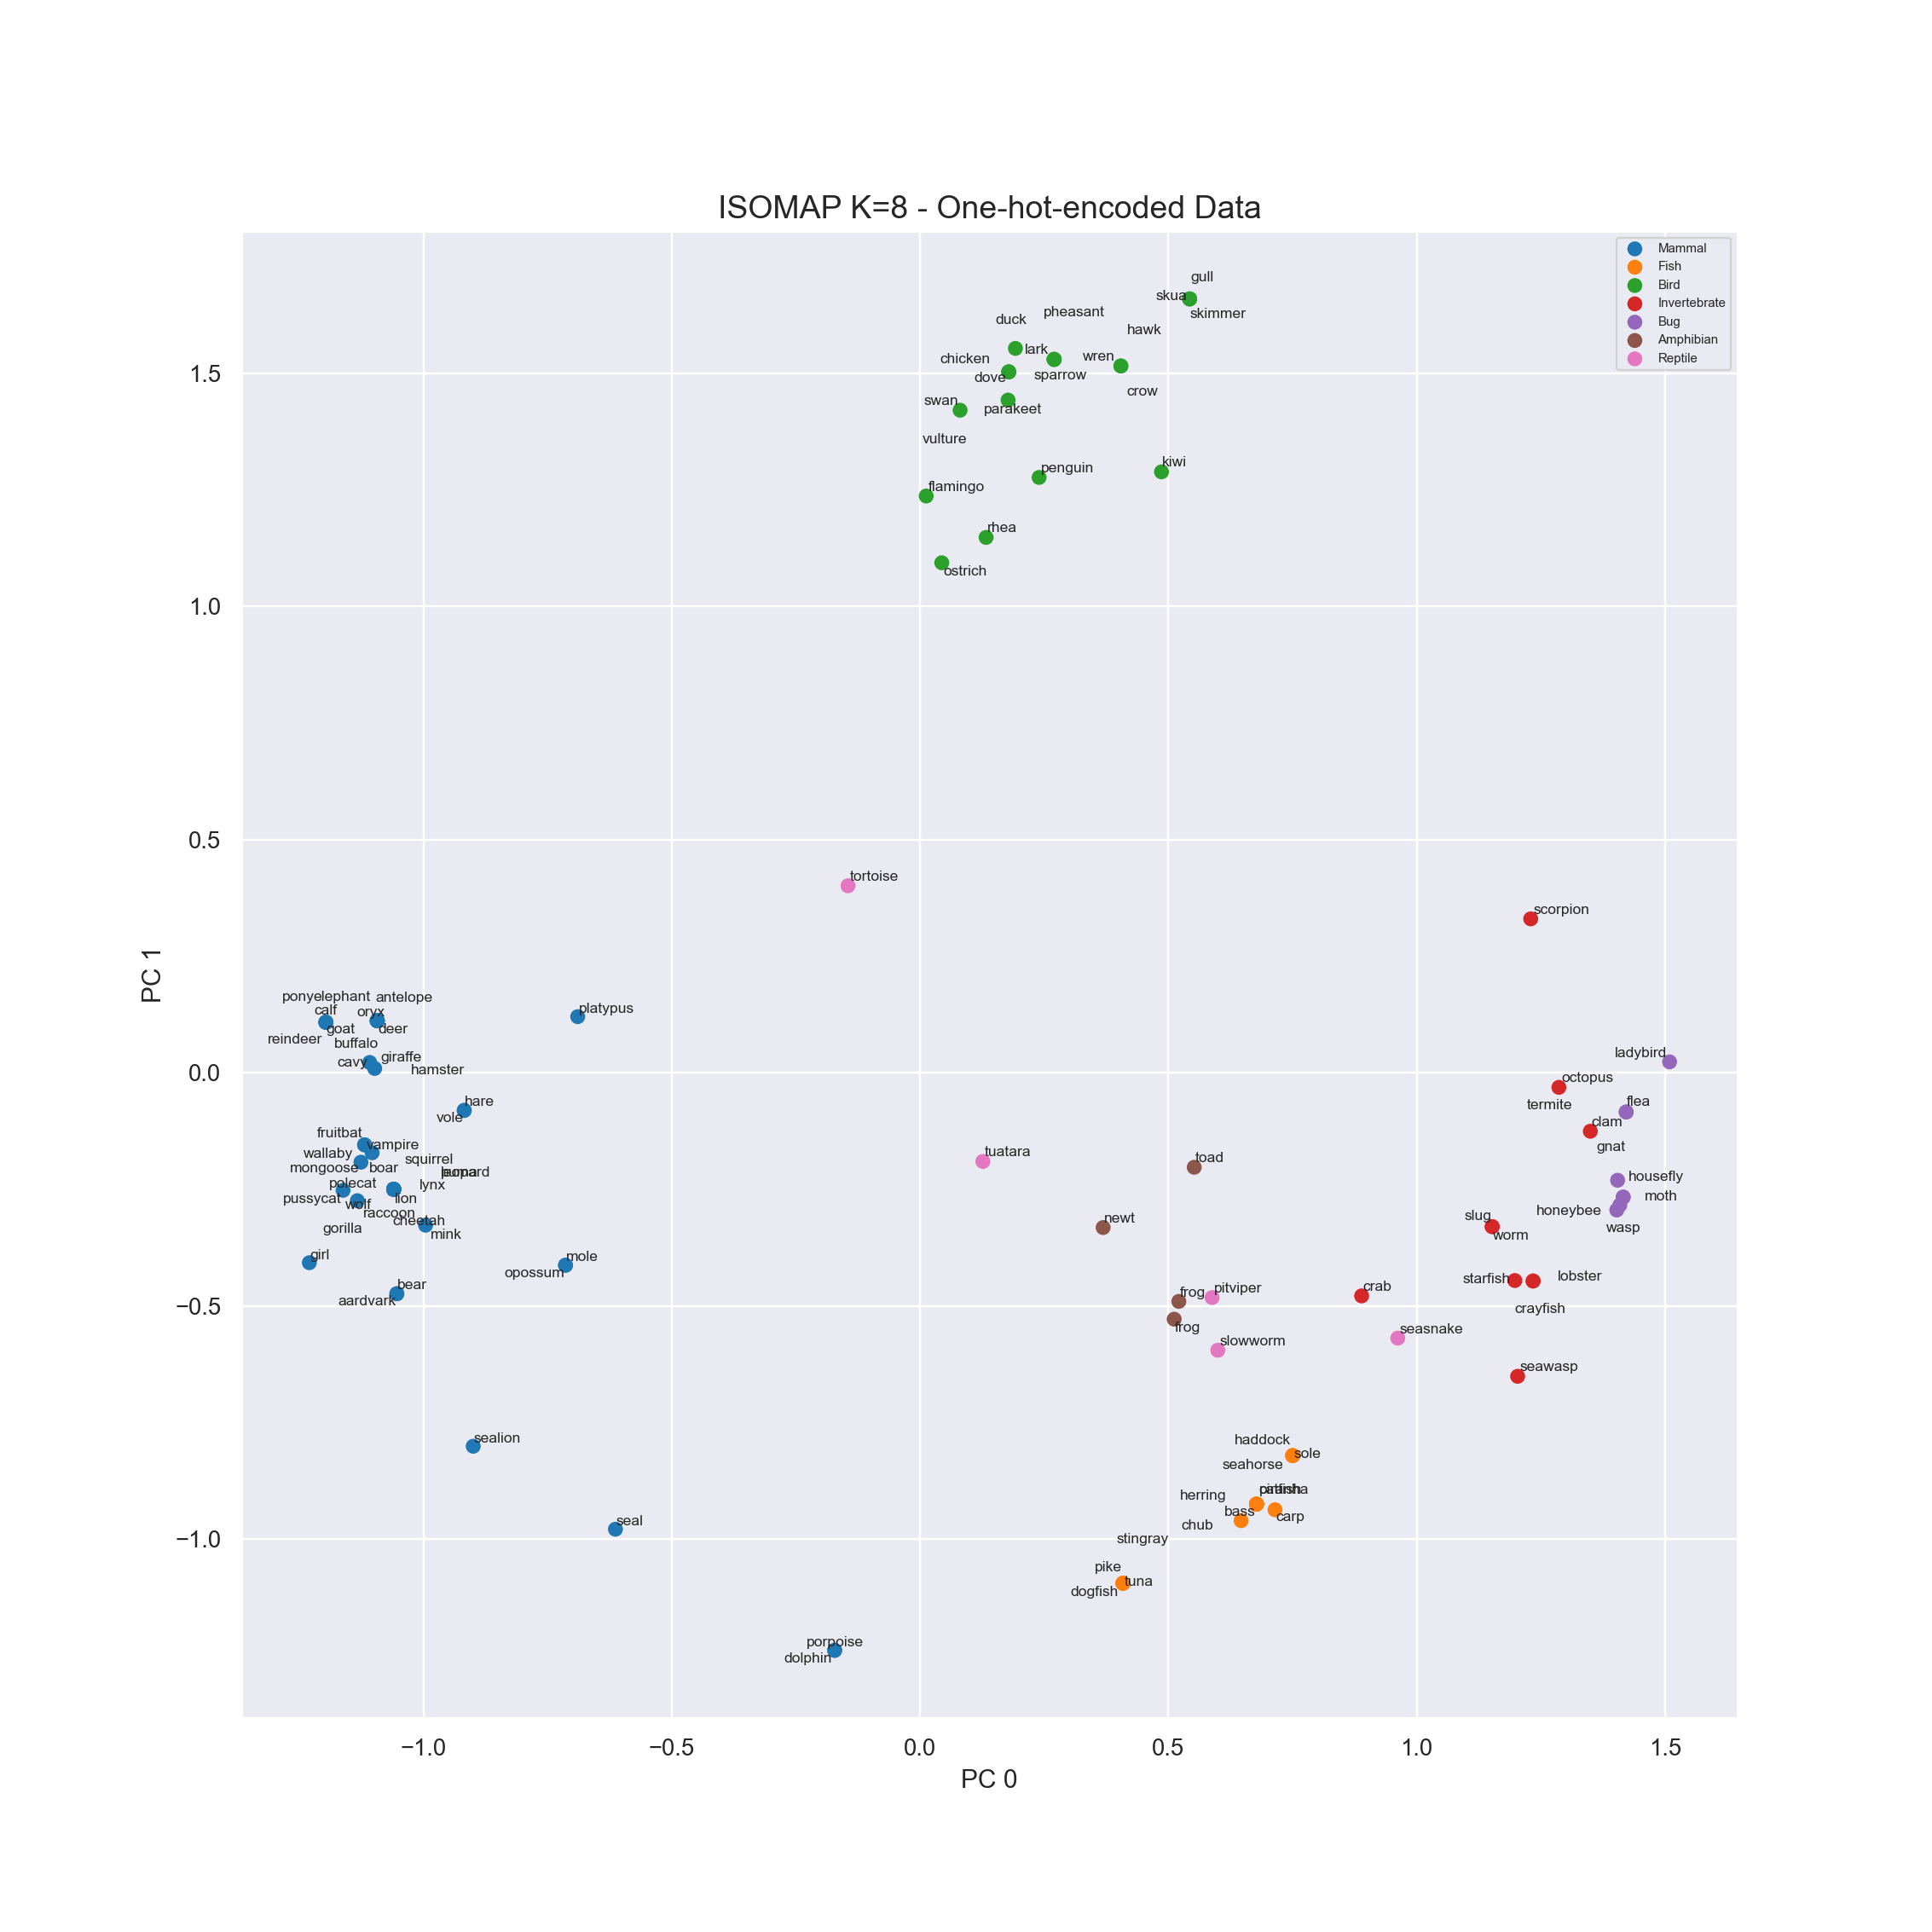

In [11]:
k = 8
ass1.iso_map(k)
ax = plot_scatter(ass1.animals_k_isomap_df, "ISOMAP K={} - One-hot-encoded Data".format(k), fsize=(7,7), axis_text = "PC ", save="images/")

<IPython.core.display.Javascript object>


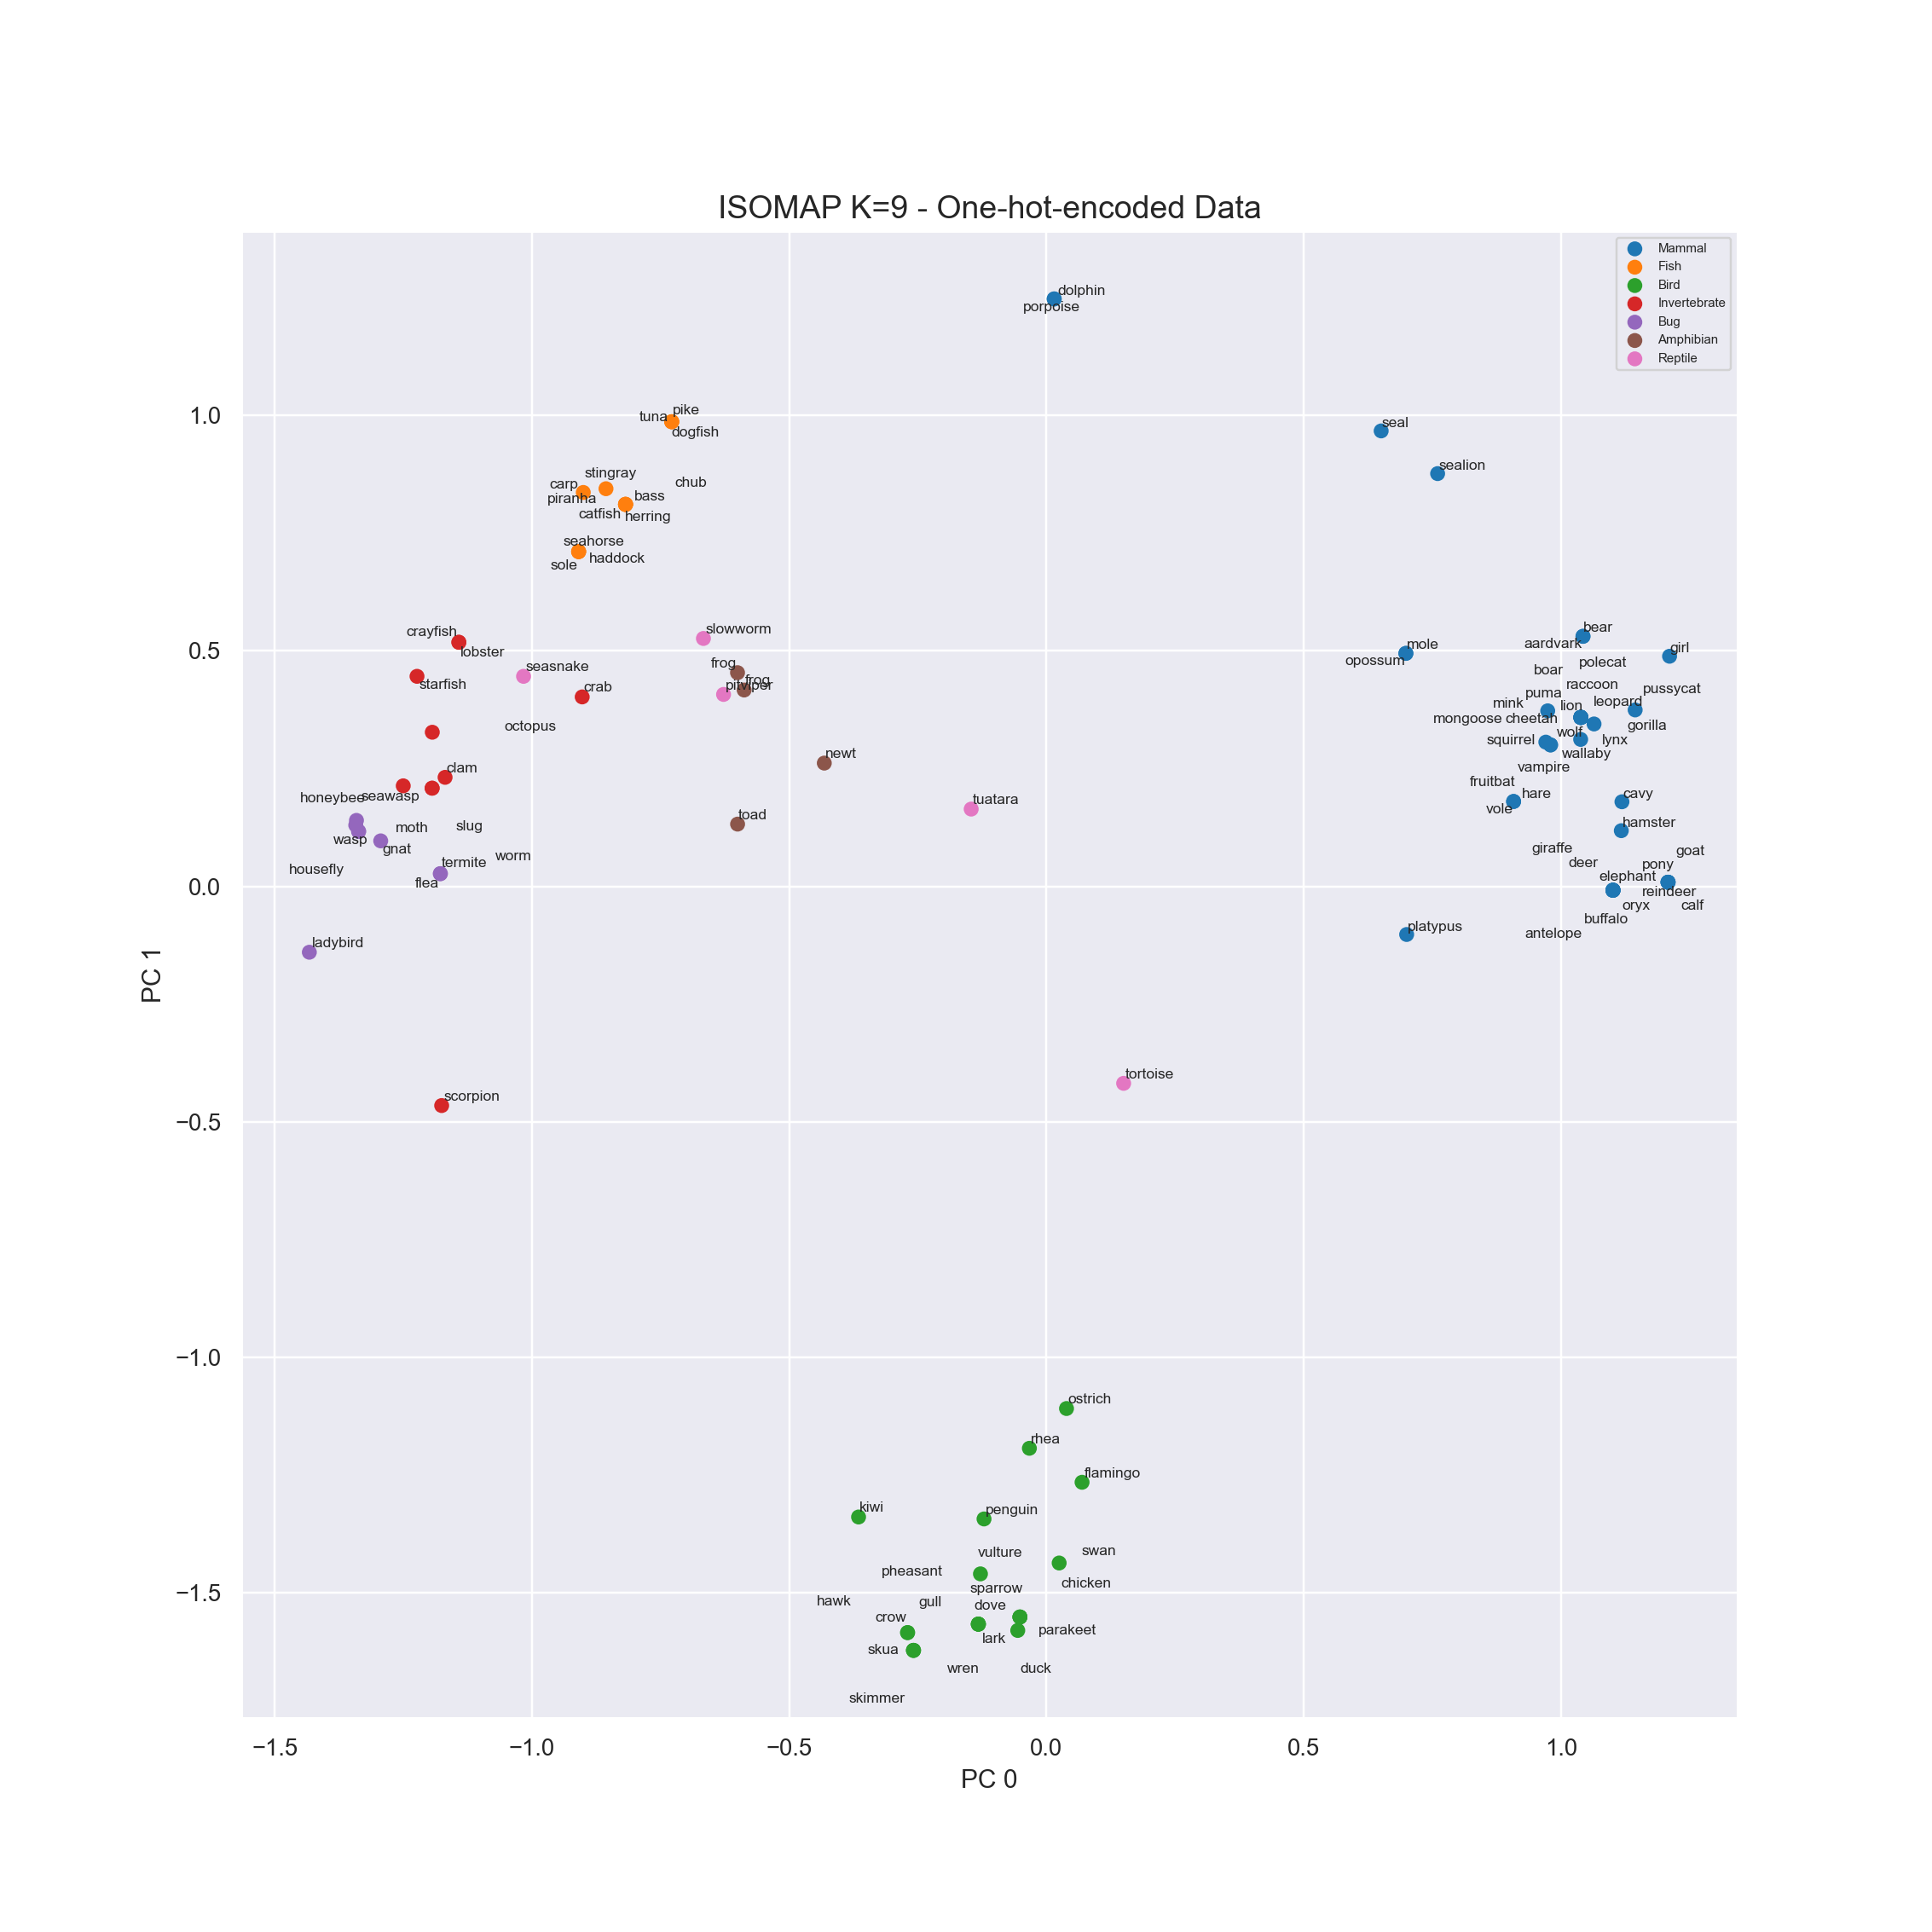

In [12]:
k = 9
ass1.iso_map(k)
ax = plot_scatter(ass1.animals_k_isomap_df, "ISOMAP K={} - One-hot-encoded Data".format(k), fsize=(7,7), axis_text = "PC ", save="images/")

<IPython.core.display.Javascript object>


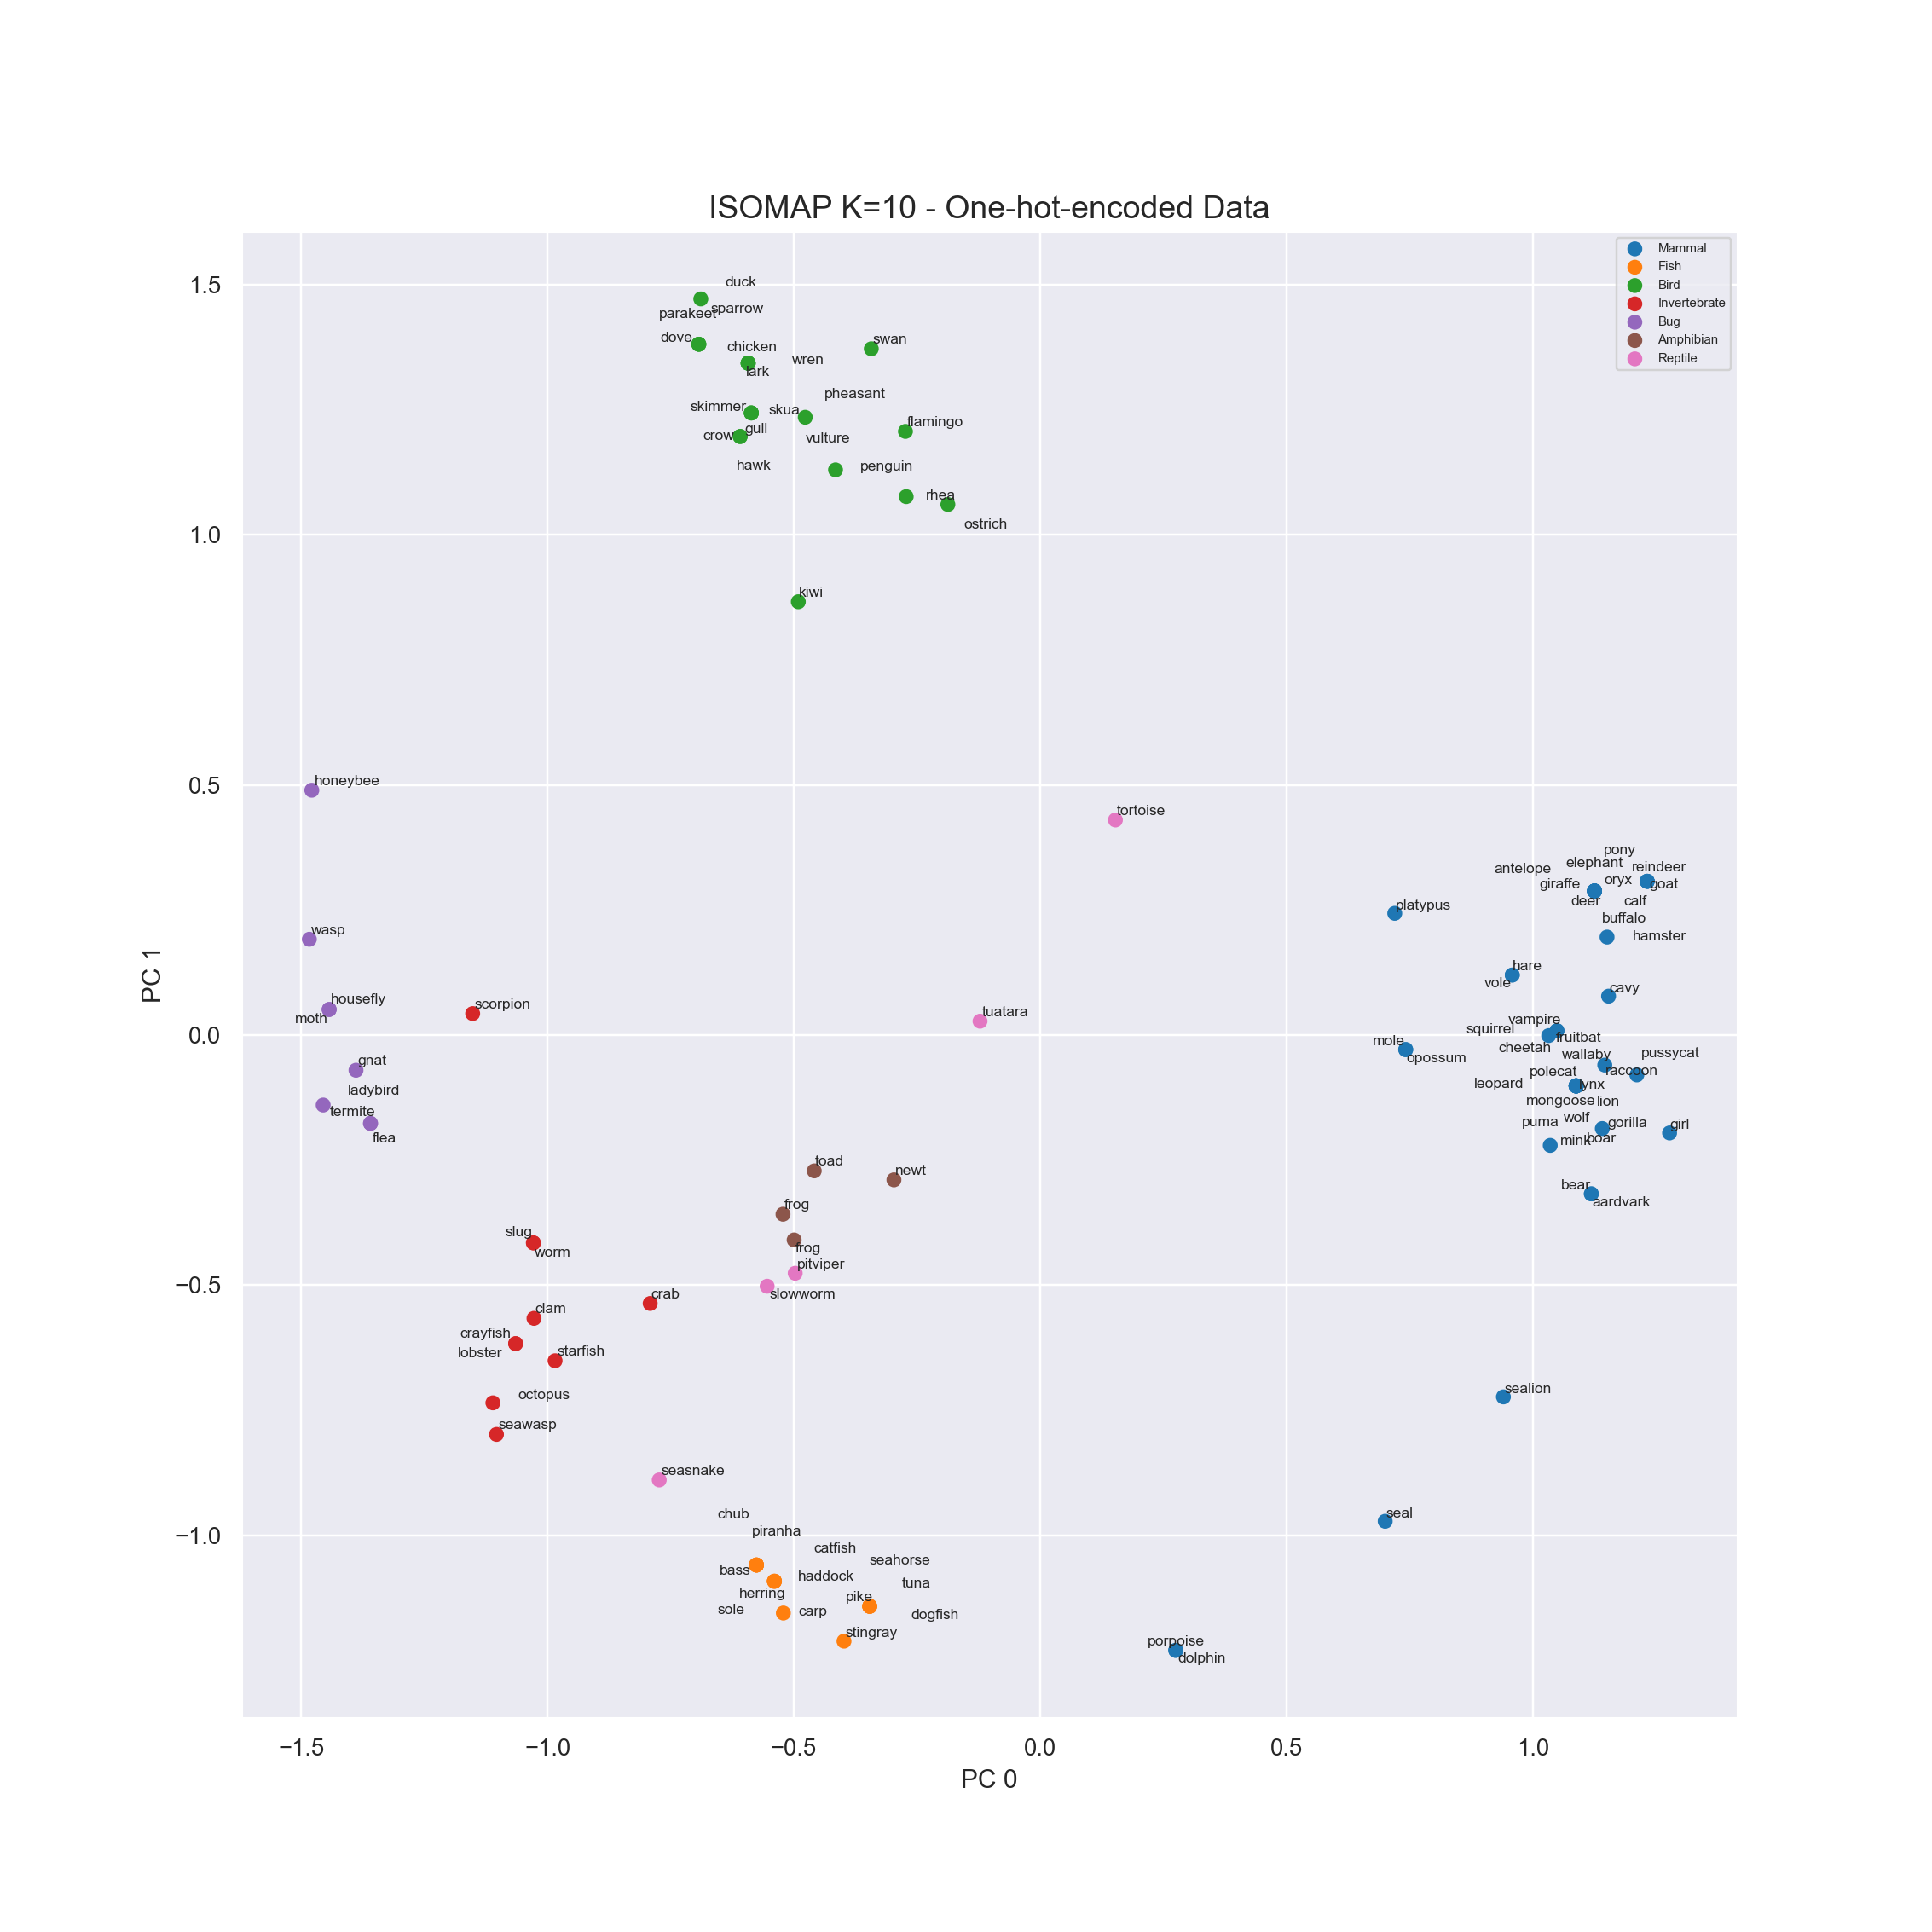

In [3]:
k = 10
ass1.iso_map(k)
ax = plot_scatter(ass1.animals_k_isomap_df, "ISOMAP K={} - One-hot-encoded Data".format(k), fsize=(7,7), axis_text = "PC ", save="images/")

<IPython.core.display.Javascript object>


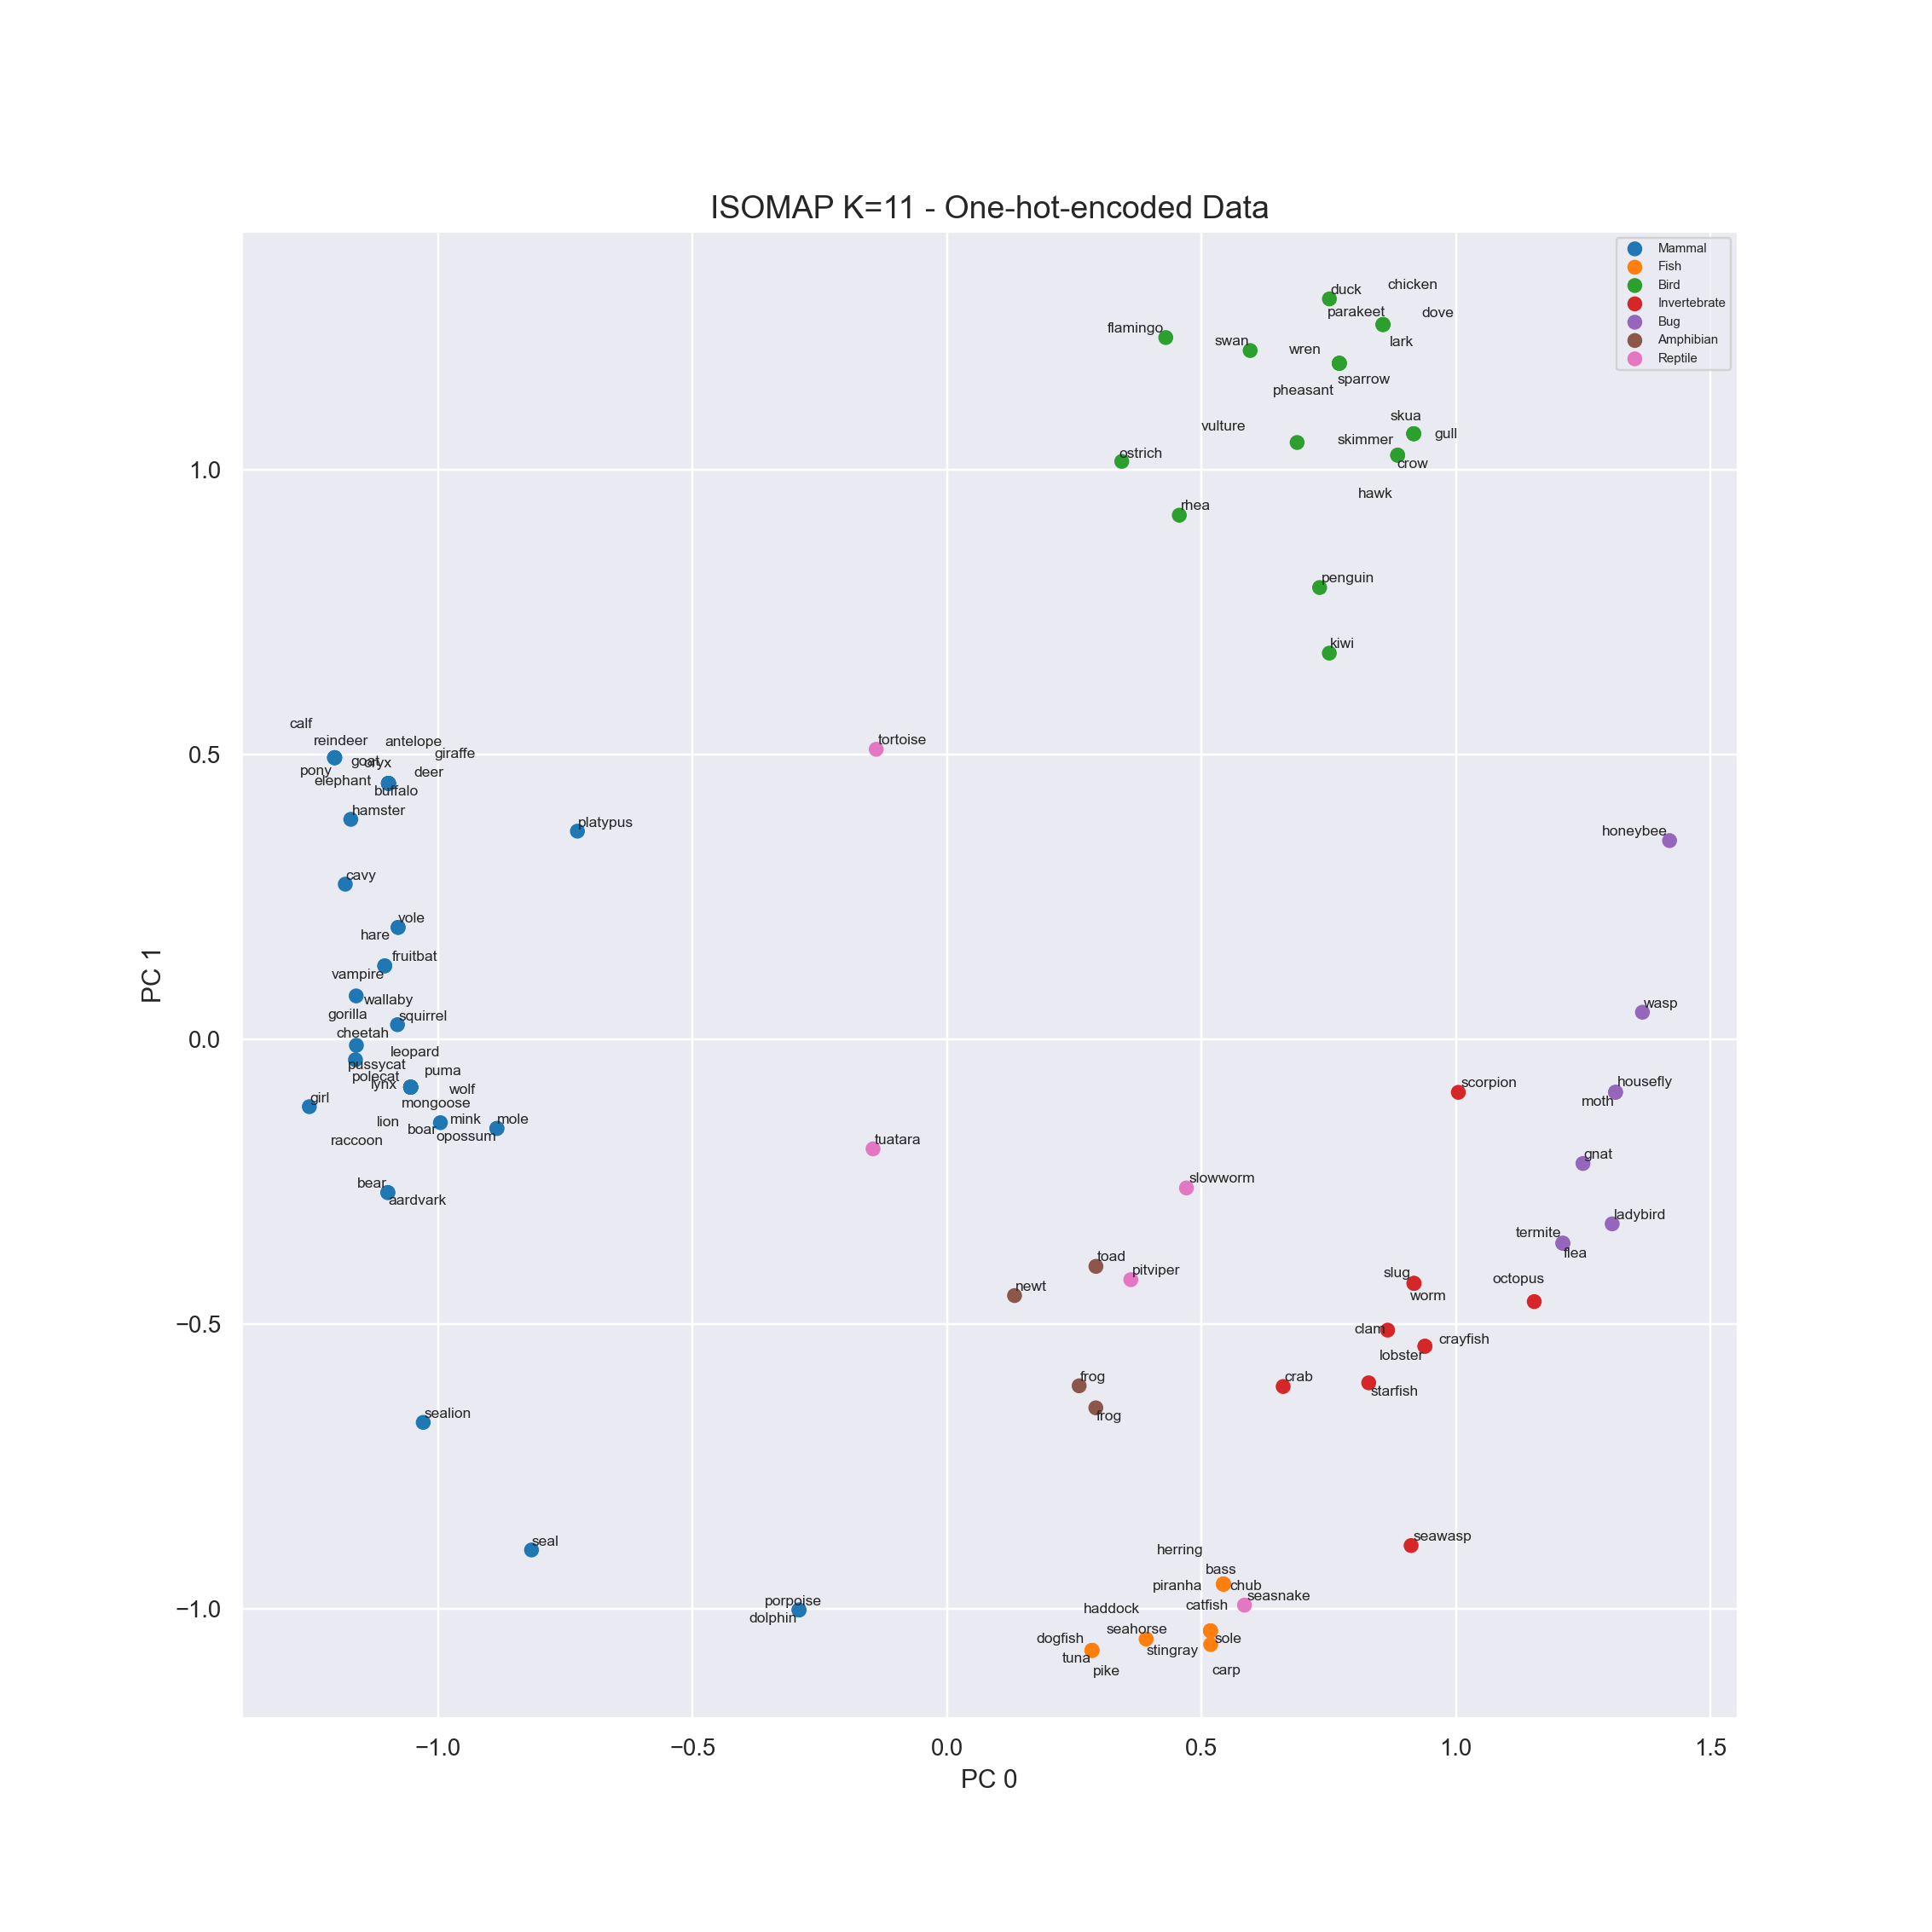

In [14]:
k = 11
ass1.iso_map(k)
ax = plot_scatter(ass1.animals_k_isomap_df, "ISOMAP K={} - One-hot-encoded Data".format(k), fsize=(7,7), axis_text = "PC ", save="images/")

<IPython.core.display.Javascript object>


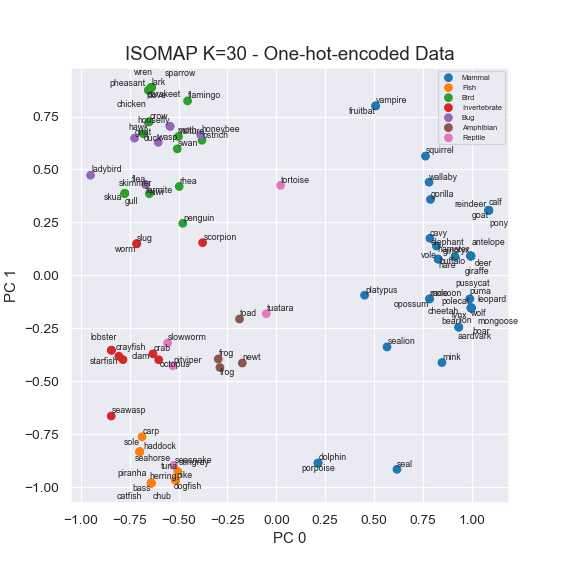

In [93]:
k = 30
ass1.iso_map(k)
ax = plot_scatter(ass1.animals_k_isomap_df, "ISOMAP K={} - One-hot-encoded Data".format(k), fsize=(7,7), axis_text = "PC ", save="images/")

In [98]:
#Check the eigenvalues importance
animals_k_isomap_df, lamda, vl = ass1.iso_map(5)
print("Isomap 5")
print(lamda[:5].real)
print((lamda/lamda.sum())[:5].real)
print((lamda/lamda.sum())[:2].real.sum())

animals_k_isomap_df, lamda, vl = ass1.iso_map(8)
print("Isomap 8")
print(lamda[:5].real)
print((lamda/lamda.sum())[:5].real)
print((lamda/lamda.sum())[:2].real.sum())


animals_k_isomap_df, lamda, vl = ass1.iso_map(12)
print("Isomap 12")
print(lamda[:5].real)
print((lamda/lamda.sum())[:5].real)
print((lamda/lamda.sum())[:2].real.sum())

animals_k_isomap_df, lamda, vl = ass1.iso_map(30)
print("Isomap 30")
print(lamda[:5].real)
print((lamda/lamda.sum())[:5].real)
print((lamda/lamda.sum())[:2].real.sum())



print("\n MDS")
animals_k_mds_df, lamda,vl = ass1.mds_distance_matrix()
print(lamda[:5].real)
print((lamda/lamda.sum())[:5].real)

print("\n MDS Importance")
weighted_animals_k_mds_df, lamda_w, vl = ass1.mds_distance_matrix_importance()
print(lamda_w[:21].real)
print((lamda_w/lamda_w.sum())[:5].real)



Isomap 5
[235.57209358  54.29951245  38.07765845  18.48554525  16.10420911]
[0.54532717 0.12569825 0.08814619 0.04279229 0.03727972]
0.6710254134161202
Isomap 8
[84.01325155 65.04697646 31.75164112 12.53443549 11.41862383]
[0.3173315  0.24569284 0.11993103 0.04734457 0.04312997]
0.5630243367610823
Isomap 12
[81.76404085 61.79055256 21.03250103 10.27587586  9.0162892 ]
[0.3417229  0.25824612 0.08790279 0.04294678 0.03768249]
0.5999690177476898
Isomap 30
[54.73669686 32.32832119 17.93314623  9.75862078  7.60018912]
[0.32124135 0.18973    0.10524691 0.05727186 0.04460435]
0.5109713549022459

 MDS
[28.43753828 17.26298952 11.09457163  7.21500672  4.7683769 ]
[0.22022948 0.13369016 0.08591994 0.05587534 0.03692785]

 MDS Importance
[273.8048704  116.7827978   76.04504795  33.98453873  26.70713542
  24.19596214  16.34349731  14.70875356  12.67791489  11.59303469
  10.56019263   9.83113563   9.24416562   8.73523851   7.28592595
   7.19233851   6.96038745   5.77100529   5.14610268   4.74658319

<IPython.core.display.Javascript object>


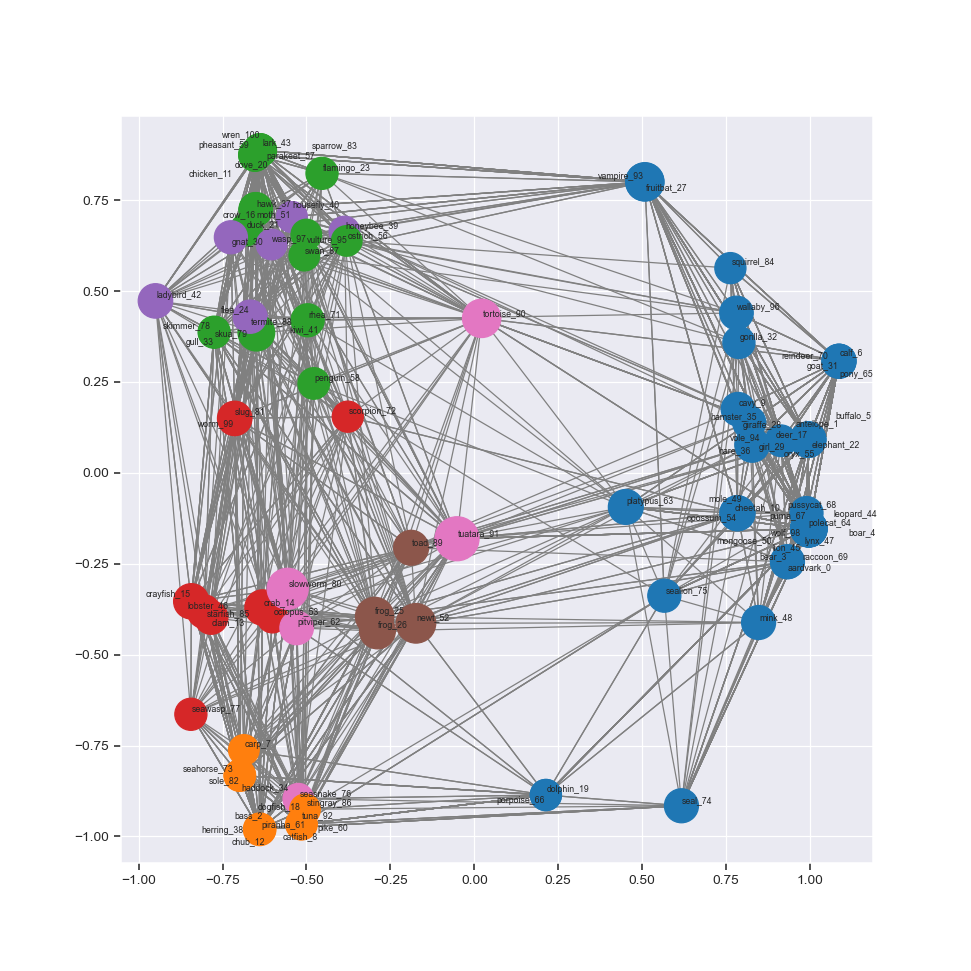

In [84]:
ass1.iso_map(30)
ass1.plot_graph(show_axis=True, mds_position=True, fsize=(12,12), save="images/", adjust_tex=False)

<IPython.core.display.Javascript object>


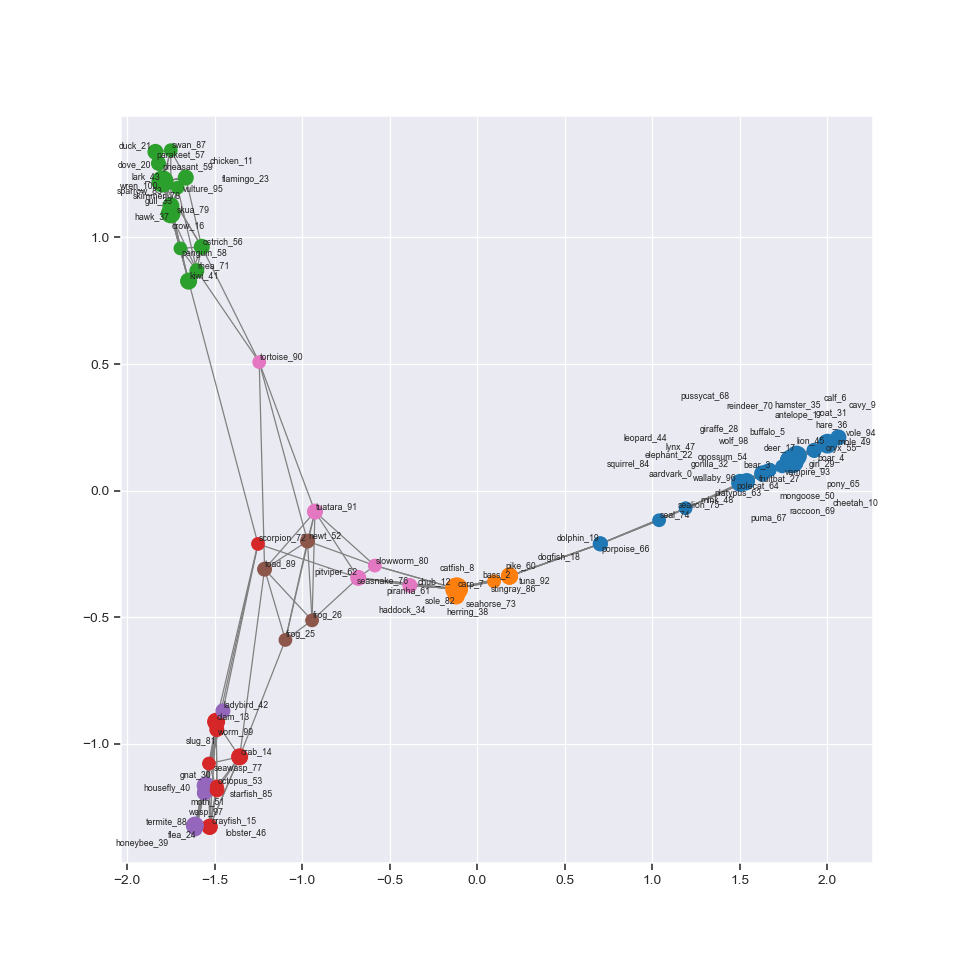

<IPython.core.display.Javascript object>


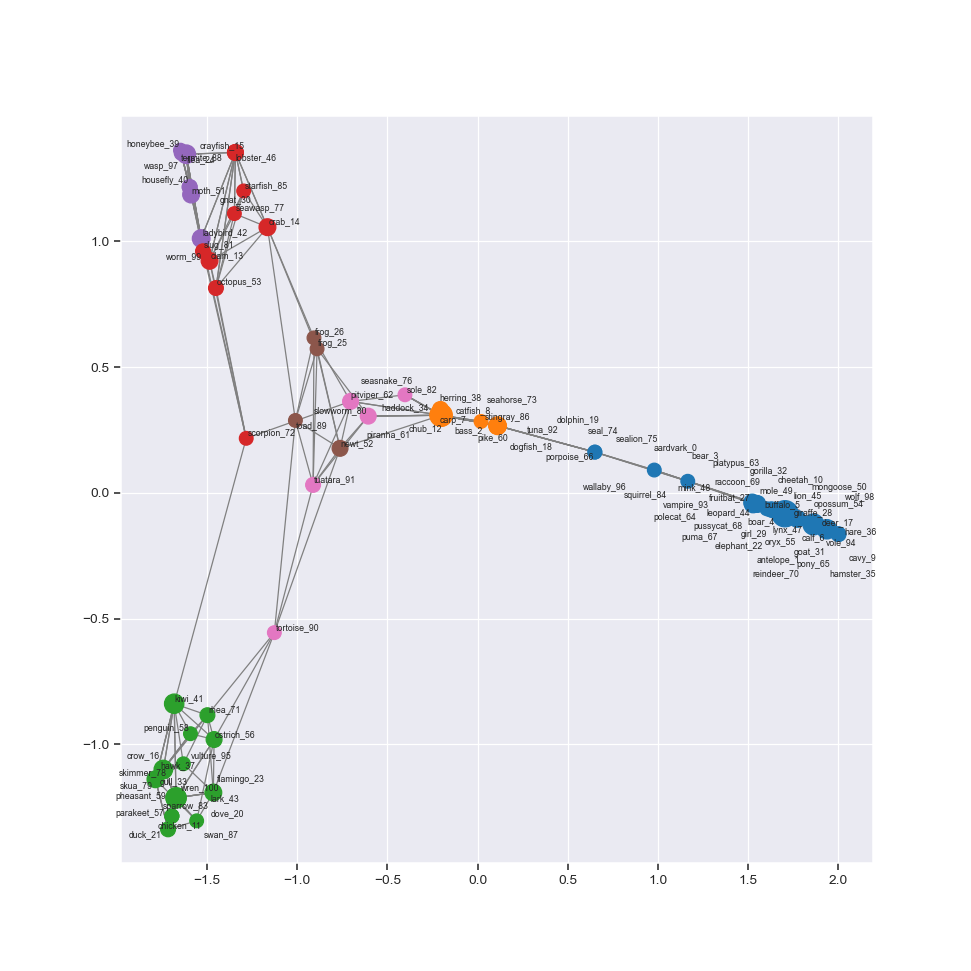

<IPython.core.display.Javascript object>


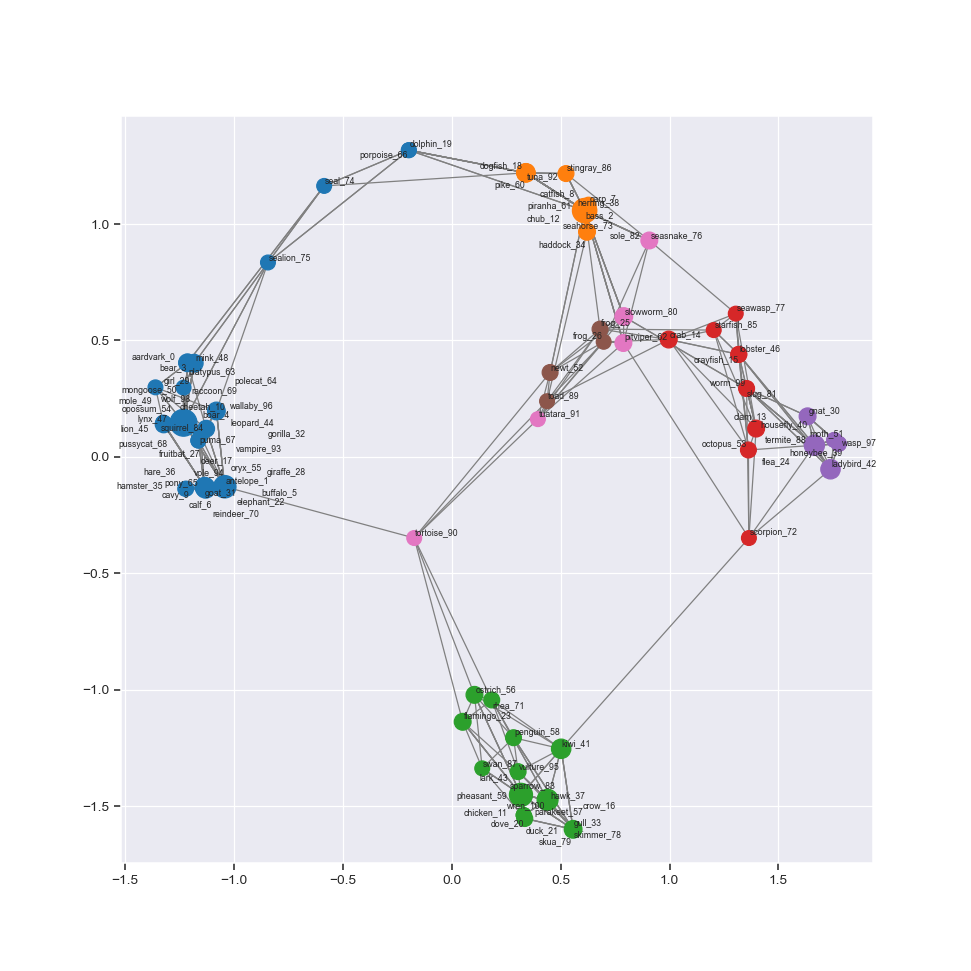

<IPython.core.display.Javascript object>


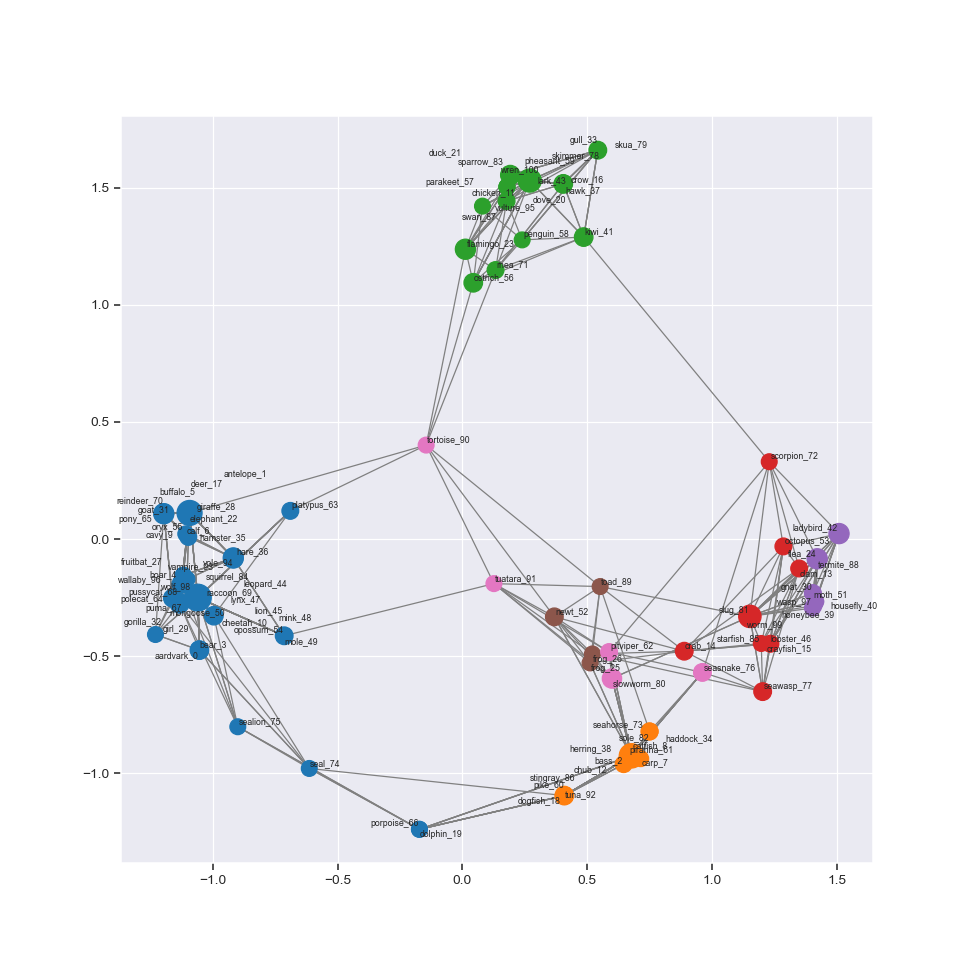

<IPython.core.display.Javascript object>


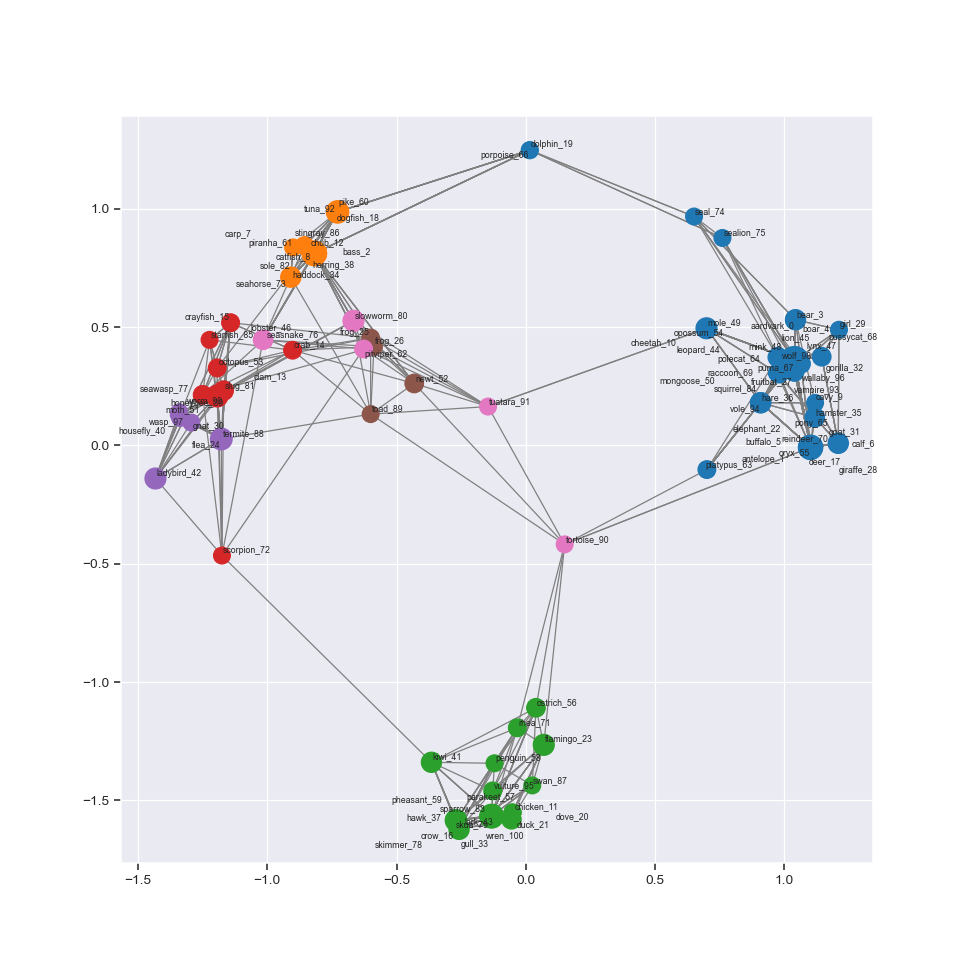

<IPython.core.display.Javascript object>


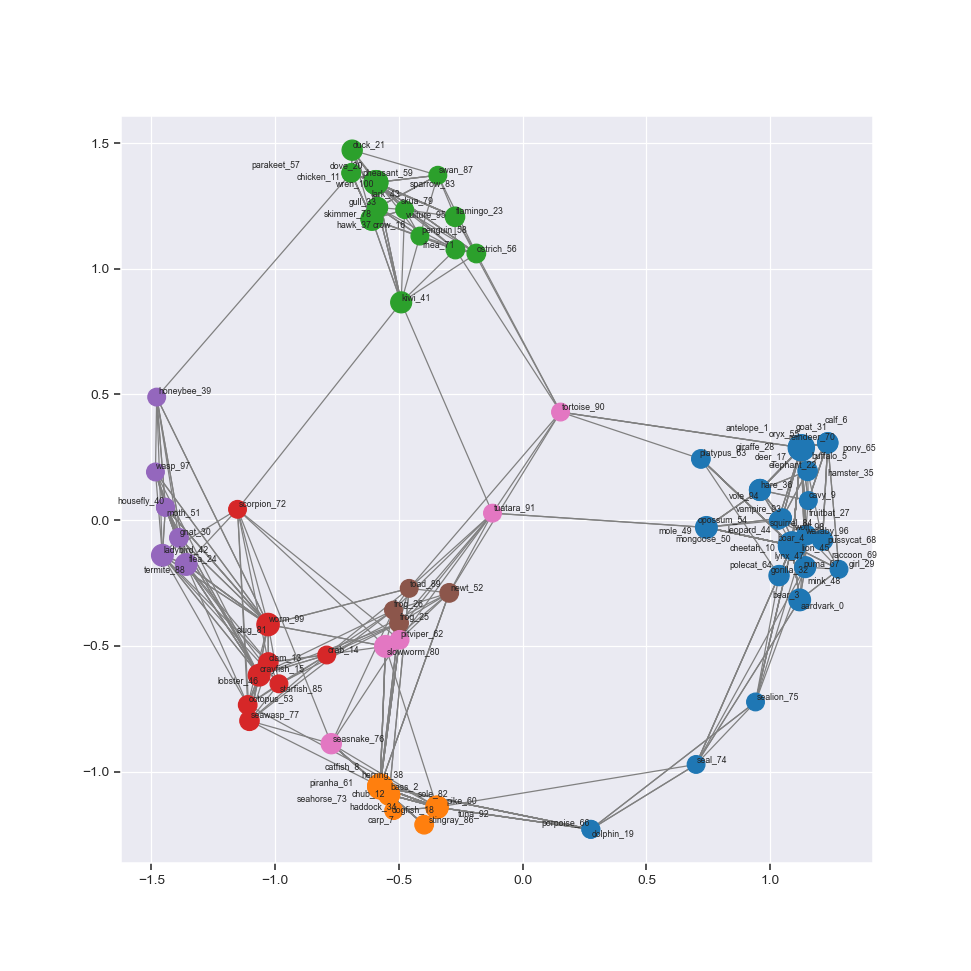

<IPython.core.display.Javascript object>


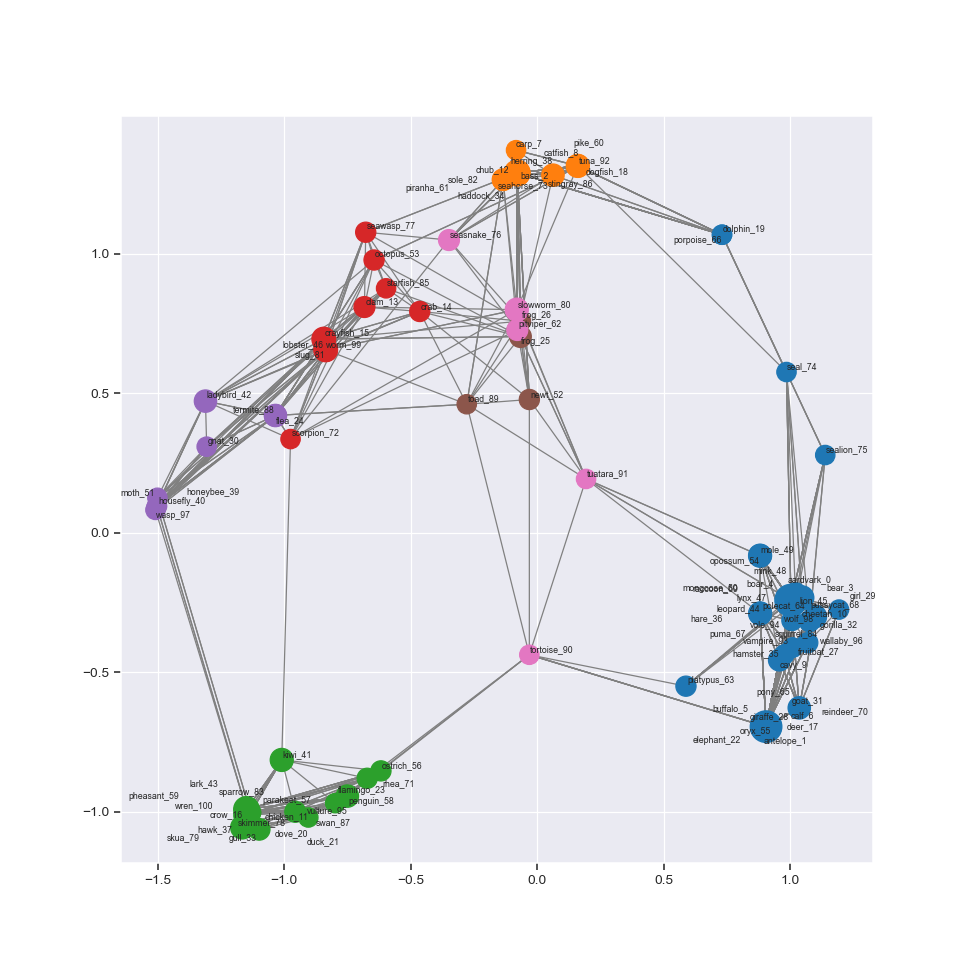

In [38]:
ass1.iso_map(5)
ass1.plot_graph(show_axis=True, mds_position=True, fsize=(12,12), save="images/")
ass1.iso_map(6)
ass1.plot_graph(show_axis=True, mds_position=True, fsize=(12,12), save="images/")
ass1.iso_map(7)
ass1.plot_graph(show_axis=True, mds_position=True, fsize=(12,12), save="images/")
ass1.iso_map(8)
ass1.plot_graph(show_axis=True, mds_position=True, fsize=(12,12), save="images/")
ass1.iso_map(9)
ass1.plot_graph(show_axis=True, mds_position=True, fsize=(12,12), save="images/")
ass1.iso_map(10)
ass1.plot_graph(show_axis=True, mds_position=True, fsize=(12,12), save="images/")
ass1.iso_map(12)
ass1.plot_graph(show_axis=True, mds_position=True, fsize=(12,12), save="images/")